# Derivatives Analytics - Objects Composition

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Chapter 6 Object-Oriented Programming.


- [Object-Oriented Programming in Python](https://python-textbok.readthedocs.io/en/1.0/index.html): Section [Object-oriented programming](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html)



# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# for date management
import datetime as dt

# 1. Optional parameters: `*args` and `**kwargs` <a name="args_kwargs"></a>

Python implements a simple way to specify _optional_ parameters in a function:

- With `*` operator before parameter name - like `*args` - you can indicate a variable-length Tuple of positional parameters. Possibly no one.

- With `**` operator before parameter name - like `**kwargs` - you can indicate a variable-length Dict of keyword parameters. Possibly no one.

Example:

In [2]:
a_0, b_0, c_0 = (1, 2, 3) # standard way to un-pack a Tuple

In [3]:
def print_args(*args):
    for arg in args:
        print(arg)

In [4]:
print_args(a_0, b_0, c_0)

1
2
3


In [5]:
print_args(a_0, b_0)

1
2


In [6]:
print_args(a_0)

1


In [7]:
print_args() # does nothing

In [8]:
def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print("%s: %s" % (k, v))

In [9]:
print_kwargs(a=a_0, b=b_0, c=c_0)

a: 1
b: 2
c: 3


In [10]:
print_kwargs(a=a_0, b=b_0)

a: 1
b: 2


In [11]:
print_kwargs(a=a_0)

a: 1


In [12]:
print_kwargs() # does nothing

The naming `*args` and `**kwargs` in function definition is a convention: `*pippo` and `**pluto` is valid but discouraged. 

You can build a completely generic function that accepts optional parameters as positional and keyword parameters as well

In [13]:
def print_all(*args, **kwargs):
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("%s: %s" % (k, v))

In [14]:
print_all(a_0, b_0, c_0, a=a_0, b=b_0, c=c_0)

1
2
3
a: 1
b: 2
c: 3


In [15]:
print_all(c_0, a=a_0, b=b_0)

3
a: 1
b: 2


In [16]:
print_all() # does nothing

In the following sections we review some common use cases.

## 1.1. Input flexibility <a name="input_flexibility"></a>

Optional parameter `*args` and `**kwargs` allow input flexibility. Input parameters can be either 
- a list of individual positional parameters, 
- or a list of individual keyword parameters, 
- or complete/incomplete mixtures of the two kinds

In [17]:
def f(*args, **kwargs):
    # parsing of input parameters
    a = args[0] if len(args) > 0 else kwargs['a'] if 'a' in kwargs else "a_default"
    b = args[1] if len(args) > 1 else kwargs['b'] if 'b' in kwargs else "b_default"
    c = args[2] if len(args) > 2 else kwargs['c'] if 'c' in kwargs else "c_default"
    print("a={}, b={}, c={}".format(a, b, c))

In [18]:
a_0, b_0, c_0 = (1, 2, 3) # standard way to un-pack a Tuple

In [19]:
f(a_0, b_0, c_0) # order does matter: a <-- a_0, ..., c <--- c_0

a=1, b=2, c=3


In [20]:
f(c=c_0, a=a_0, b=b_0) # order doesn't matter

a=1, b=2, c=3


In [21]:
f(a_0, b_0) # c not specified

a=1, b=2, c=c_default


In [22]:
f(a_0) # b and c not specified

a=1, b=b_default, c=c_default


In [23]:
f() # no parameters at all

a=a_default, b=b_default, c=c_default


In [24]:
f(a_0, b_0, c=c_0) # mixture of list and keyword parameters

a=1, b=2, c=3


In [25]:
f(a_0, b=b_0) # incomplete mixture of individual and keyword parameters

a=1, b=2, c=c_default


## 1.2. Mixing required and optional parameters <a name="mix_param"></a>

Mixing ordinary (required positional and default) and optional parameters is possible. 
 
In function definition, you should follow the (conventional) order:
 1. ordinary required positional parameters
 2. ordinary default parameters
 3. optional `*args`
 4. optional `**kwargs`
 
And, when calling the function, the rule is that all positional arguments (both ordinary positional and optional positional `*args` arguments, if any) must come before all keyword arguments (both ordinary default arguments and optional `**kwargs` arguments, if any).

In [26]:
def f(a, b="b_default", *args, **kwargs):
    """
    Parameters:
        a: ordinary positional
        b: ordinary default
        *args: optional positional
        **kwargs: optional keyword
    """
    
    print("a={}, b={}".format(a, b))
    
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In this case, parameter `b` is explicitly set as the second positional argument or a keybord argument

In [27]:
a_0, b_0, c_0 = (1, 2, 3) # standard way to un-pack a Tuple

In [28]:
f(a_0, b_0) # no additional *args or **kwargs parameter

a=1, b=2


In [29]:
f(a_0) # b is default

a=1, b=b_default


In [30]:
f(a_0, b_0, c_0) # with optional positional argument

a=1, b=2
3


In [31]:
f(a_0, b_0, c=c_0) # with optional keyword argument 

a=1, b=2
c: 3


but `a` and `b` at least are required

In [32]:
# Raises: TypeError: f() missing 1 required positional argument: 'a'
#
# f() # no parameters at all

and positional arguments (neither required, nor optional) must come before keyword arguments

In [33]:
# Raises: SyntaxError: positional argument follows keyword argument
# 
# f(a=a_0, b_0) # 'b' as positional argument after 'a' as keyword argument 

In [34]:
# Raises: SyntaxError: positional argument follows keyword argument
#
# f(a_0, b=b_0, c_0) # optional positional argument after 'b' as keyword argument 

## 1.3. _Agnostic_ arguments flow <a name="agnostic_flow"></a>

_Agnostic_ arguments flow is possible when calling a `nested_func` from an `interface_func`: the outer function does need to access its specific parameters but doesn't need to know the details about the nested function parameters

In [35]:
def nested_func(a, b, c):
    print("In nested_func: a={}, b={}, c={}".format(a, b, c))
        
def interface_func(d, e, f, *args, **kwargs):
    # calling nested_func
    nested_func(*args, **kwargs)
    print("In interface_func: d={}, e={}, f={}".format(d, e, f))

In [36]:
a_0, b_0, c_0, d_0, e_0, f_0 = (1, 2, 3, 4, 5, 6)

In [37]:
interface_func(d_0, e_0, f_0, a_0, b_0, c_0) # order does matter: d <-- d_0, ..., c <--- c_0

In nested_func: a=1, b=2, c=3
In interface_func: d=4, e=5, f=6


In [38]:
interface_func(d=d_0, b=b_0, a=a_0, e=e_0, f=f_0, c=c_0) # order doesn't matter

In nested_func: a=1, b=2, c=3
In interface_func: d=4, e=5, f=6


_Agnostic_ arguments flow smoothly generalizes to classes. When calling a `BaseClass` initializer instantiating a `DerivedClass` object, the sub-class does need to access its specific parameters but doesn't need to know the details about the parent's class parameters

In [39]:
class BaseClass:
    def __init__(self, a, b, c):
        print("In BaseClass: a={}, b={}, c={}".format(a, b, c))
        
class DerivedClass(BaseClass):
    def __init__(self, d, e, f, *args, **kwargs):    
        # calling the BaseClass initializer
        super(DerivedClass, self).__init__(*args, **kwargs)
        print("In DerivedClass: d={}, e={}, f={}".format(d, e, f))

In [40]:
a_0, b_0, c_0, d_0, e_0, f_0 = (1, 2, 3, 4, 5, 6)

In [41]:
obj = DerivedClass(d_0, e_0, f_0, a_0, b_0, c_0) # order does matter: d <-- d_0, ..., c <--- c_0

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=6


In [42]:
obj = DerivedClass(d=d_0, b=b_0, a=a_0, e=e_0, f=f_0, c=c_0) # order doesn't matter

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=6


### 1.3.1 _Agnostic_ arguments flow with default arguments <a name="agnostic_flow_default_args"></a>

The convention to put `*args` and `**kwargs` at the end of function definition has an exception. Consider the following example that we state directly using classes (but is valid in the case of functions too). 

Suppose that the `DerivedClass` has an ordinary default parameter `f="f_default"` and its `BaseClass`, that is instantiated by the `DerivedClass` initializer, has a ordinary positional arguments.

As before, you would be tempted to define this situation as follows:

In [43]:
class BaseClass:
    def __init__(self, a, b, c):
        print("In BaseClass: a={}, b={}, c={}".format(a, b, c))
        
class DerivedClass(BaseClass):
    def __init__(self, d, e, f="f_default", *args, **kwargs):    
        # calling the BaseClass initializer
        super(DerivedClass, self).__init__(*args, **kwargs)
        print("In DerivedClass: d={}, e={}, f={}".format(d, e, f))

In [44]:
a_0, b_0, c_0, d_0, e_0, f_0 = (1, 2, 3, 4, 5, 6)

As long as you want to set `f` to a specific value, it works

In [45]:
obj = DerivedClass(d_0, e_0, f_0, a_0, b_0, c_0) # 'f' is the third positional argument, followed by other positional arguments

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=6


In [46]:
obj = DerivedClass(d_0, e_0, f=f_0, a=a_0, b=b_0, c=c_0) # 'f' is a keyword argument, followed by other keyword arguments

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=6


But how can you leave `f` set to its default value `"f_default"`? You would be tempted to omit `f` from function call. But if you do this:

```python
obj = DerivedClass(d_0, e_0, a_0, b_0, c_0) # 'f' is omitted, followed by other positional arguments
```

This would raise:

```python
TypeError: __init__() missing 1 required positional argument: 'c'
```

Why? 

So, `d_0` and `e_0` values are assigned to `DerivedClass`'s parameters `d` and `e`, respectively. That's what we expected.

Nevertheless, `a_0` value is not assigned - as we intended - to parameter `BaseClass`' parameter `a`, but in fact it gets assigned to `DerivedClass`' parameter `f` itself (which is then not left to its default value `"f_default"`)

Indeed, we instantiate `DerivedClass` with `a_0` value as third positional argument. But the third positional argument of `DerivedClass` initializer is a place-holder for the value to be assigned to parameter `f`. 

Consequently, `b_0` is assigned to `a` (in `BaseClass`) and `c_0` is assigned to `b` (in `BaseClass`). 

Therefore, the Python interpreter thinks we forgot to input a value for the required `BaseClass`'s parameter `c` and raises the error.

What you could do is to specify the `BaseClass`' parameters as keyword parameters (using `**kwargs`)

In [47]:
obj = DerivedClass(d_0, e_0, a=a_0, b=b_0, c=c_0) # 'f' is omitted, followed by other keyword arguments

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=f_default


but there is no way to leave `f` to default and passing `a_0, b_0, c_0` arguments as positional parameters to be assigned (using `*args`) to `BaseClass`' `a, b, c` parameters. This might seem a bit ugly. And it is.

The solution is inverting the position of `f` in `DerivedClass`' initializer definition with the positional parameters `*args` to be passed `BaseClass`. As follows:

In [48]:
class BaseClass:
    def __init__(self, a, b, c):
        print("In BaseClass: a={}, b={}, c={}".format(a, b, c))
        
class DerivedClass(BaseClass):
    def __init__(self, d, e, *args, f="f_default", **kwargs):    
        # calling the BaseClass initializer
        super(DerivedClass, self).__init__(*args, **kwargs)
        print("In DerivedClass: d={}, e={}, f={}".format(d, e, f))

There we go:

In [49]:
obj = DerivedClass(d_0, e_0, a_0, b_0, c_0) # 'f' is omitted, followed by other positional arguments

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=f_default


In [50]:
obj = DerivedClass(d_0, e_0, a=a_0, b=b_0, c=c_0) # 'f' is omitted, followed by other keyword arguments

In BaseClass: a=1, b=2, c=3
In DerivedClass: d=4, e=5, f=f_default


We'll see an example of this amendement to the convention of having `*args` and `**kwargs` to the end of a function definition when deriving the `DigitalOption` class - having a default `cash_amount=1` parameter - as a sub-class of the `EuropeanOption` base class. 

# Polymorphism application: a `Plotter()` class

# SOME generic UTILITY FUNCTIONS

In [51]:
def datetime_obj_to_date_string(date):
    """
    Utility function to convert: from dt.datetime object --> to 'dd-mm-YYYY' String
    """
    return date.strftime("%d-%m-%Y") if isinstance(date, dt.datetime) else date

In [52]:
def date_string_to_datetime_obj(date_string):
    """
    Utility function to convert: from 'dd-mm-YYYY' String object --> to dt.datetime
    """
    return dt.datetime.strptime(date_string, "%d-%m-%Y") if isinstance(date_string, str) else date_string

In [53]:
date_string_to_datetime_obj("15-05-2020")

datetime.datetime(2020, 5, 15, 0, 0)

In [54]:
# date_string_to_datetime_obj("a") # uncontrolled error - can be difficult to spot it when this utility function gets called under the hood

In [55]:
def test_valid_format(date_string, date_format="%d-%m-%Y"):
    """
    Utility function to test whether a date_string String in input is conform to date_format (default: 'dd-mm-YYYY') date format.
    If not raises an error.
    """
    try:
        dt.datetime.strptime(date_string, date_format)
    except ValueError:
        print("String '{}' in input is not conform to 'dd-mm-YYYY' date format".format(date_string))
        raise
    else:
        return True

In [56]:
def date_string_to_datetime_obj(date_string):
    """
    Utility function to convert: from 'dd-mm-YYYY' String object --> to dt.datetime.
    ValueError, due to wrong date format of the input String, is controlled.
    """
    
    return dt.datetime.strptime(date_string, "%d-%m-%Y") if (isinstance(date_string, str) and test_valid_format(date_string)) \
                                                         else date_string

In [57]:
# date_string_to_datetime_obj("a") # controlled error

In [58]:
from collections.abc import Iterable

In [59]:
def is_iterable(x):
    """
    Utility function to check if input can be iterated over (that is, if input is a List, np.array, pd.date_range, etc.).
    """    
    return isinstance(x, Iterable)

In [60]:
def is_iterable_not_string(x):
    """
    Utility function to check if input can be iterated over (that is, if input is a List, np.array, pd.date_range, etc.)
    but it is not a String
    """
    return is_iterable(x) and not isinstance(x, str)

In [61]:
def is_numeric(x):
    """
    Utility function to check if input is/contains numeric data.
    """
    
    if is_iterable_not_string(x):
        return isinstance(x[0], float) or isinstance(x[0], int)
    else:
        return isinstance(x, float) or isinstance(x, int)

In [62]:
def is_date(x):
    """
    Utility function to check if input is/contains date-like data.
    The error due to invalid (non 'dd-mm-YYYY') date Strings is controlled thanks to test_valid_format() function.
    """
    
    if is_iterable_not_string(x):
        return isinstance(x[0], dt.datetime) or (isinstance(x[0], str) and test_valid_format(x[0]))
    else:
        return isinstance(x, dt.datetime) or (isinstance(x, str) and test_valid_format(x))

# 2. Objects Composition <a name="obj_composition"></a>

As we have seen in the previous lesson, classes allow to organize the code into logical groups, combining data (attributes) with the functions (methods) which use that data. 

When dealing with multiple related objects, we can model their relationship too. In Python, there are two main types of relationships between objects: _composition_ and _inheritance._

We have already introduced _inheritance_ as a way to organize related objects in a hierarchical way, implementing an _"is a"_ relationship between the sub-class(es) and the base class. Nevertheless, hierarchical relationship is not the only possible kind of relationship between objects.

Another possible relationship between objects is _composition,_ which models an _"has a"_ relationship between objects. This is achieved making one object and attribute of the other. For example something like this:

In [291]:
class Professor:
    pass

class Department:
    def __init__(self, department_name, prof_obj):
        self.name = department_name
        self.prof = prof_obj

# instantiating 'a_prof' as a Professor object
a_prof = Professor()

# instantiating a Department object, having 'a_prof' as .prof attribute
dept = Department(department_name="Physics", prof_obj=a_prof)

Here we make a `Professor` object `a_prof` the `.prof` attribute of class `Department`. Such that the `Department` object `dept` _has a_ `Professor`. _En passant,_ notice the [`pass` statement](https://docs.python.org/3.7/tutorial/controlflow.html#pass-statements): it does nothing but it can be used when some statement is required syntactically, but the program doesn't need to do anything.

For semplicity, we model the Professor-Department relationship as a 1-to-1 _composition,_ but we could easily thought of many Professors belonging to a single Department, a 1-to-many composition relationship. In general, a composition relationship can be a 1-to-1, 1-to-many or even a many-to-many relationship.

The implementation of a composition is rather broad too. For example, instead of making the whole `Professor` object an attribute of `Department`, you might have decided to parse (all or some of) `Professor`'s attributes and use them as data in `Department`

In [292]:
class Professor:
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname

class Department:
    def __init__(self, department_name, prof_obj):
        self.name = department_name
        self.prof_name = "{} {}".format(prof_obj.name, prof_obj.surname)

# make 'a_prof' a Professor object
a_prof = Professor(name="Richard", surname="Feynman")

# instantiating a Department object, having 'a_prof' as .prof attribute
dept = Department(department_name="Physics", prof_obj=a_prof)

dept.prof_name

'Richard Feynman'

Strictly speaking, to qualify for composition, the objects involved should be tightly related and one object should _belong_ exclusively to the other. The own existance of the _belonging_ object is managed by the hosting object: when the hosting object ceases to exist, the belonging object should cease to exist too.

When the relationship between the two objects is still a _"has a"_ relationship, but their link is somehow weaker, we call this relationship an _aggregation._

In this notebook we shall see a couple of _composition_ / _aggregation_ - like relationships:

- between a `MarketEnvironment` class and a `EuropeanOption` class, modeling an option which is emitted under certain market circumstances (date, short-rate and underlying level);

- between options (either a `PlainVanillaOption` class or a `DigitalOption` class) and a `Portfolio` class, modeling the aggregation of securities in a portfolio.

## 2.1. A common market environment: the `MarketEnvironment` class <a name="MarketEnvironment"></a>

Let's define a common `MarketEnvironment` class which shall contain the information on the market circumstances under which we are going to model our derivatives. 

These market conditions are the valuation date $t$, the short-rate level $r$ (we recall that here and in all this notebook we shall assume constant deterministic short-rate), the underlying level at emission $S_t$ and its annual volatility $\sigma$. 

In [63]:
class MarketEnvironment:
    """
    MarketEnvironment class: setting the market environment: date, underlying level, volatility level and short-rate.
    
    Attributes:
    -----------
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        r (float):                continuously compounded short-rate;
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
    Usage: 
    --------   
        - default: MarketEnvironment() is equivalent to 
                   MarketEnvironment(t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2)

        - general: MarketEnvironment(t="DD-MM-YYYY" String, r=Float, S_t=Float, sigma=Float)
    """
    
    def __init__(self, t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2):
        
        print("Initializing the MarketEnvironment!")
        
        self.__t     = date_string_to_datetime_obj(t)
        self.__r     = r
        self.__S     = S_t
        self.__sigma = sigma
        
    def __repr__(self):
        return r"MarketEnvironment(t={}, r={:.1f}%, S_t={:.1f}, sigma={:.1f}%)".\
               format(self.get_t().strftime("%d-%m-%Y"), self.get_r()*100, self.get_S(), self.get_sigma()*100)

    # getters
    def get_t(self):
        return self.__t

    def get_r(self):
        return self.__r

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    # setters 
    def set_t(self, t):
        self.__t = date_string_to_datetime_obj(t)

    def set_r(self, r):
        self.__r = r

    def set_S(self, S):
        self.__S = S
        
    def set_sigma(self, sigma):
        self.__sigma = sigma

Here is a `MarketEnvironment` object

In [64]:
market_env = MarketEnvironment(t="01-06-2020", r=-0.002, S_t=10.0, sigma=0.4)
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=01-06-2020, r=-0.2%, S_t=10.0, sigma=40.0%)

or using default values for its attributes

In [65]:
market_env = MarketEnvironment()
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

## 2.2. Aggregation of `EuropeanOption` with `MarketEnvironment`  <a name="EuropeanOption_compose_MarketEnvironment"></a>

Here is our `EuropeanOption` class, composed with the `MarketEnvironment`.

In [66]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    It uses a MarketEnvironment object to define the current market conditions under which the option is modeled. 
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = date_string_to_datetime_obj(T)
        self.__tau   = self.time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = date_string_to_datetime_obj(T)
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))
    
    # utility methods
    def time_to_maturity(self, *args, **kwargs):
        """
        Utility method to compute time-to-maturity
        """
        
        # parsing optional parameters
        t = args[0] if len(args) > 0 else kwargs['t'] if 't' in kwargs else self.get_t()
        T = args[1] if len(args) > 1 else kwargs['T'] if 'T' in kwargs else self.get_T()
        
        # convert to dt.datetime objects, if needed
        t = date_string_to_datetime_obj(t)
        T = date_string_to_datetime_obj(T)
        
        # compute and return time to maturity (in years)
        return (T-t).days / 365.0
    
    def parse_S_tau_parameters(self, *args, **kwargs):
        """
        Utility method to parse underlying and time-parameters
        """

        # underlying value 
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()

        # time parameter:
        time_param = args[1] if len(args) > 1 \
                     else kwargs['tau'] if 'tau' in kwargs \
                        else (kwargs['t'] if 't' in kwargs else None)
        
        # check that no multiple time parameters in input
        if is_iterable_not_string(time_param):
            raise NotImplementedError("No multiple time parameters allowed: {} given in input.".format(time_param))

        # time parameter interpretation according to its type        
        # case 1: no time-parameter in input
        if time_param is None:
            tau = self.get_tau()
        # case 2: valid time-to-maturity in input
        elif is_numeric(time_param):
            tau = time_param
        # case 3: valuation date in input, to be converted into time-to-maturity
        elif is_date(time_param):
            valuation_date = date_string_to_datetime_obj(time_param)
            tau = self.time_to_maturity(t=valuation_date)
        # error case: the time parameter in input has a data-type that is not recognized
        else: 
            raise TypeError("Type {} of input time parameter not recognized".format(type(time_param)))

        return S, tau
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()

Notice that in the initializer we parse the market environment and use its attributes to define those of the european option. Alternatively, we could have defined a market environment attribute with the `MarketEnvironment` object itself.

In [67]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption initializer
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} [K={:.1f}, T={} (tau={:.2f}y)]".format(self.get_type(), self.get_K(), datetime_obj_to_date_string(self.get_T()), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%, t={}]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100, datetime_obj_to_date_string(self.get_t()))
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value 
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if is_iterable(S):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if is_iterable(S):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)

        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if is_iterable(S):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if is_iterable(S):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if is_iterable(S):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if is_iterable(S) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if is_iterable(S) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [68]:
Vanilla_Call = PlainVanillaOption(market_env, option_type='call', K=110.0, T="31-12-2022")
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [69]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [70]:
Vanilla_Call.payoff() # using .get_S() 

0.0

In [71]:
Vanilla_Call.payoff(90) # using args[0] for S

0.0

In [72]:
Vanilla_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [73]:
Vanilla_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [74]:
Vanilla_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [75]:
Vanilla_Call.price() # using .get_S() and .get_tau()

3.487402470943657

In [76]:
Vanilla_Call.price(90) # using args[0] for S

3.487402470943657

In [77]:
Vanilla_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.1434251971537872

In [78]:
isinstance(Vanilla_Call.get_T(), dt.datetime)

True

In [79]:
Vanilla_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.1434251971537872

In [80]:
Vanilla_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.1434252 , 2.77365415])

In [81]:
Vanilla_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.1434252 , 2.77365415])

In [82]:
Vanilla_Call.price([90, 100.0], 0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.1434252 , 2.77365415])

In [83]:
Vanilla_Call.price_upper_limit() # using .get_S() and .get_tau()

90.0

In [84]:
Vanilla_Call.price_upper_limit(90) # using args[0] for S

90

In [85]:
Vanilla_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

90

In [86]:
Vanilla_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

90

In [87]:
Vanilla_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

[90, 100.0]

In [88]:
Vanilla_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

[90, 100.0]

In [89]:
Vanilla_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [90]:
Vanilla_Call.price_lower_limit(90) # using args[0] for S

0.0

In [91]:
Vanilla_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [92]:
Vanilla_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [93]:
Vanilla_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.        , 0.49875208])

In [94]:
Vanilla_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.        , 0.49875208])

**USAGE WITH 't' PARAMETER**

In [95]:
Vanilla_Call.get_tau()

0.7013698630136986

In [96]:
Vanilla_Call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [97]:
Vanilla_Call.time_to_maturity(t="19-05-2020")

0.6191780821917808

In [98]:
Vanilla_Call.price(t="19-05-2020")

3.0284908618071924

In [99]:
Vanilla_Call.price(tau=Vanilla_Call.time_to_maturity(t="19-05-2020"))

3.0284908618071924

the same can be done in the put case

In [100]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [101]:
Vanilla_Put.payoff() # using .get_S() 

10.0

etc

In [102]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption initializer
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} [K={:.1f}, T={} (tau={:.2f}y), Q={:.1f}]".format(self.get_type(), self.get_K(), datetime_obj_to_date_string(self.get_T()), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%, t={}]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100, datetime_obj_to_date_string(self.get_t()))

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if is_iterable(S):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if is_iterable(S):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if is_iterable(S):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if is_iterable(S) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if is_iterable(S) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if is_iterable(S) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if is_iterable(S) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [103]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [104]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [105]:
CON_Call = DigitalOption(market_env, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [106]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [107]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [108]:
CON_Call.payoff() # using .get_S() 

0.0

In [109]:
CON_Call.payoff(90) # using args[0] for S

0.0

In [110]:
CON_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [111]:
CON_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [112]:
CON_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [113]:
CON_Call.price() # using .get_S() and .get_tau()

0.29674605684957245

In [114]:
CON_Call.price(90) # using args[0] for S

0.29674605684957245

In [115]:
CON_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.05251830091808269

In [116]:
CON_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.05251830091808269

In [117]:
CON_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.0525183 , 0.51632829])

In [118]:
CON_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.0525183 , 0.51632829])

In [119]:
CON_Call.price_upper_limit() # using .get_S() and .get_tau()

0.9655392811652148

In [120]:
CON_Call.price_upper_limit(90) # using args[0] for S

0.9655392811652148

In [121]:
CON_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.9950124791926823

In [122]:
CON_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.9950124791926823

In [123]:
CON_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.99501248, 0.99501248])

In [124]:
CON_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.99501248, 0.99501248])

In [125]:
CON_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [126]:
CON_Call.price_lower_limit(90) # using args[0] for S

0.0

In [127]:
CON_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [128]:
CON_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [129]:
CON_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0., 0.])

In [130]:
CON_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0., 0.])

the same can be done in the put case

In [131]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [132]:
CON_Put.payoff() # using .get_S() 

1.0

etc

Let's now define a plotter class to plot option

In [133]:
class OptionPlotter:
    
    def __init__(self, FinancialInstrument):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market at emission: " + self.fin_inst.get_mkt_info()

        # set default x-axis 
        self.__x_axis = self.x_axis(self.fin_inst.get_K())

        # set default time parameter
        self.__time_parameter, _ = self.time_parameter(self.fin_inst.get_tau())
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_time_parameter(self):
        return self.__time_parameter

    def get_title(self):
        return self.__title_label
    
    # utility methods
    def x_axis(self, *args, **kwargs):
        """
        Utility method to define the x-axis of the plot, optionally parsing x-axis in input.
        """
        
        # parsing optional parameter
        x = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_x_axis()
        
        # define the x-axis
        
        # case 1: a list of x-points in input. The x-axis is a wide range, including x-points
        if is_iterable(x):
            x_min = max(min(x)-20, 0.0)
            x_max = max(x)+20
        # case 2: a single x-point in input. The x-point is the middle point of the x-axis
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20

        return np.linspace(x_min, x_max, 100)
    
    def time_parameter(self, *args, **kwargs):
        """
        Utility method to define the time parameter of the plot, optionally parsing time parameter in input.
        It returns appropriate time parameter labels too.
        """
        
        # parsing optional parameter: notice the backslash operator '\' 
        # to split code into multiple lines for readability
        time = args[0] if len(args) == 1 \
               else args[1] if len(args) > 1 \
                   else (kwargs['tau'] if 'tau' in kwargs \
                       else (kwargs['t'] if 't' in kwargs else self.get_time_parameter()))
        
        # case 1: time-to-maturity in input (if Iterable, sort from longest to shortest)
        if is_numeric(time):
            time_parameter = np.sort(time)[::-1] if is_iterable_not_string(time) else time
            time_parameter_label = np.array([r"$\tau={:.2f}y$".format(tau) for tau in time_parameter]) \
                                    if is_iterable_not_string(time) else r"$\tau={:.2f}y$".format(time_parameter)

        # case 2: valuation date in input (if Iterable, sort from first to last, i.e. chronological order)
        elif is_date(time):
            time_parameter = np.array(sorted(time, key=date_string_to_datetime_obj)) if is_iterable_not_string(time) else time
            time_parameter_label = np.array([datetime_obj_to_date_string(t) for t in time_parameter]) \
                                    if is_iterable_not_string(time) else datetime_obj_to_date_string(time_parameter)

        else:
            raise TypeError("Time parameter {} in input has not recognized data-type \
                             (only 'dd-mm-YYYY' Strings or dt.datetime objects allowed)".format(type(time_parameter)))
            
        # case of one-element Iterable: reduced to scalar variables
        if is_iterable(time_parameter) and len(time_parameter) == 1:
            time_parameter = time_parameter[0]
            time_parameter_label = time_parameter_label[0]
                
        return time_parameter, time_parameter_label
        
    def parse_plot_details(self, *args, **kwargs):
        """
        Utility method to decide whether to plot details or not.
        """
        plot_details = args[2] if len(args) > 2 else kwargs['plot_details'] if 'plot_details' in kwargs else True
        return plot_details
                    
    def plot(self, *args, **kwargs):
        
        # argument parsing and plot setup
        x_axis = self.x_axis(*args, **kwargs)
        time_parameter, time_label_parameter = self.time_parameter(*args, **kwargs)

        if is_iterable_not_string(time_parameter):
            self.__plot_multi_time(x_axis, time_parameter, time_label_parameter)
        else:
            plot_limits = self.parse_plot_details(*args, **kwargs)
            self.__plot_single_time(x_axis, time_parameter, time_label_parameter, plot_limits)
                    
    def __plot_multi_time(self, S, multiple_times, time_labels):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple dates.
        Dates can be specified either as date Strings or time-to-maturity values.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multiple_times))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different date
        for time, time_label in zip(multiple_times, time_labels):
            ax.plot(S, self.fin_inst.price(S, time), '-', lw=1.5, label=r"price at " + time_label)

        # blue dot at original underlying level for reference
        for time, time_label in zip(multiple_times, time_labels):
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, self.fin_inst.price(S_t, time), '.', ms=10, label=r"Emission level $S={:.1f}$".format(S_t))
            
        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different dates", fontsize=12)
        ax.set_ylabel('Black-Scholes price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
 
    def __plot_single_time(self, S, time, time_label, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed date. 
        Date can be specified either as date String or time-to-maturity value.
        Optionally, it plots theoretical upper and lower bounds of the price.
        """
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, self.fin_inst.price(S, time), 'b-', lw=1.5, label=r"price at " + time_label)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, self.fin_inst.price(S_t, time), 'b.', ms=15, label=r"Emission level $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, time), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, time), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at " + time_label, fontsize=12) 
        ax.set_ylabel('Black-Scholes price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [134]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [135]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [136]:
option_plotter = OptionPlotter(Vanilla_Call)

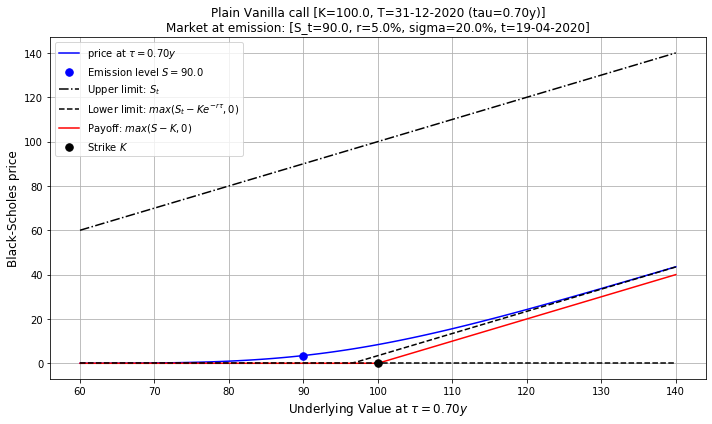

In [137]:
option_plotter.plot()

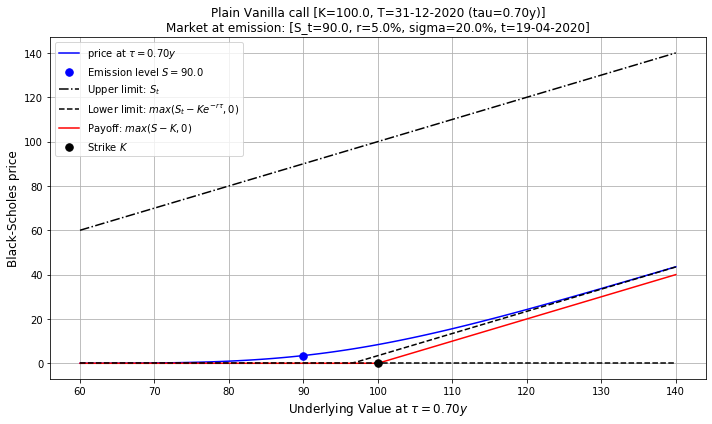

In [138]:
option_plotter.plot(plot_limits=True)

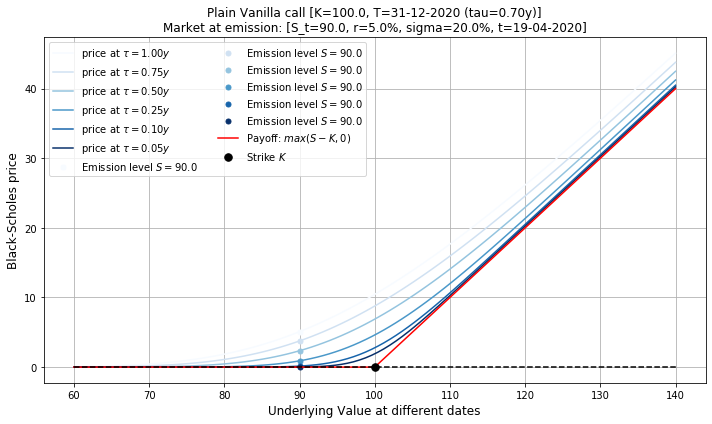

In [139]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [140]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [141]:
option_plotter = OptionPlotter(CON_Put)

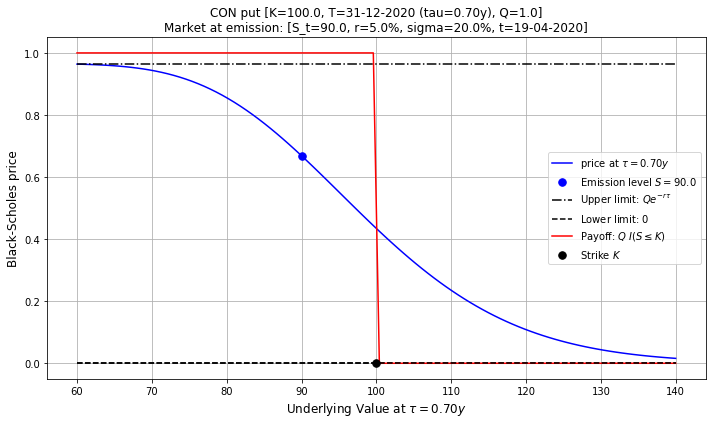

In [142]:
option_plotter.plot()

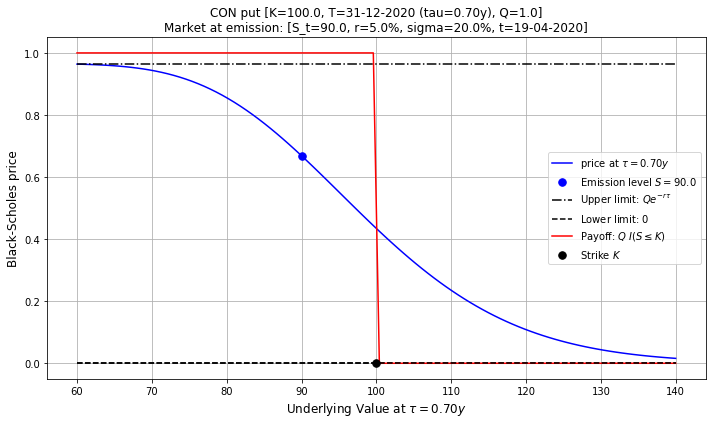

In [143]:
option_plotter.plot(plot_limits=True)

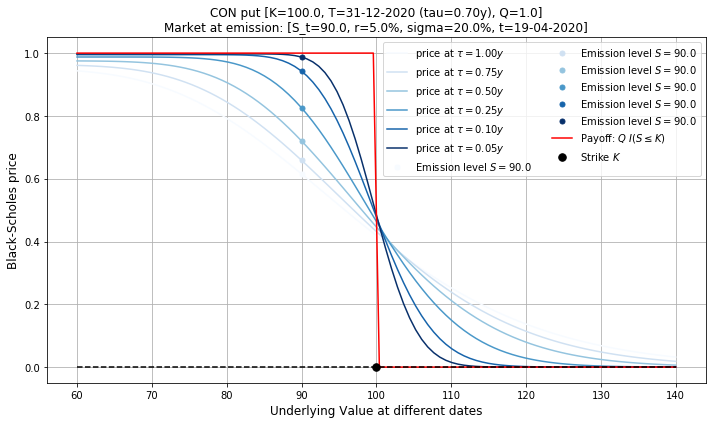

In [144]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

## _focus on:_ PnL

In [145]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    It uses a MarketEnvironment object to define the current market conditions under which the option is modeled. 
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.
            
        PnL: float
            Template method for profit and loss. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = date_string_to_datetime_obj(T)
        self.__tau   = self.time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
        
        # empty initial price of the option
        self.__initial_price = None
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    def get_initial_price(self):
        return NotImplementedError()
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = date_string_to_datetime_obj(T)
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # utility methods
    def time_to_maturity(self, *args, **kwargs):
        """
        Utility method to compute time-to-maturity
        """
        
        # parsing optional parameters
        t = args[0] if len(args) > 0 else kwargs['t'] if 't' in kwargs else self.get_t()
        T = args[1] if len(args) > 1 else kwargs['T'] if 'T' in kwargs else self.get_T()
        
        # convert to dt.datetime objects, if needed
        t = date_string_to_datetime_obj(t)
        T = date_string_to_datetime_obj(T)
        
        # compute and return time to maturity (in years)
        return (T-t).days / 365.0
    
    def parse_S_tau_parameters(self, *args, **kwargs):
        """
        Utility method to parse underlying and time-parameters
        """

        # underlying value 
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()

        # time parameter:
        time_param = args[1] if len(args) > 1 \
                     else kwargs['tau'] if 'tau' in kwargs \
                        else (kwargs['t'] if 't' in kwargs else None)
        
        # check that no multiple time parameters in input
        if is_iterable_not_string(time_param):
            raise NotImplementedError("No multiple time parameters allowed: {} given in input.".format(time_param))

        # time parameter interpretation according to its type        
        # case 1: no time-parameter in input
        if time_param is None:
            tau = self.get_tau()
        # case 2: valid time-to-maturity in input
        elif is_numeric(time_param):
            tau = time_param
        # case 3: valuation date in input, to be converted into time-to-maturity
        elif is_date(time_param):
            valuation_date = date_string_to_datetime_obj(time_param)
            tau = self.time_to_maturity(t=valuation_date)
        # error case: the time parameter in input has a data-type that is not recognized
        else: 
            raise TypeError("Type {} of input time parameter not recognized".format(type(time_param)))

        return S, tau
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()
        
    # profit and loss calculation calculation - with optional *args and **kwargs parameters
    def PnL(self, *args, **kwargs):
        """
        Can be called as:
            - PnL(): uses .get_S() and .get_tau()
            - PnL(100.0): S == 100.0
            - PnL(100.0, 0.1): S == 100.0 and tau == 0.1
            - PnL(S=100.0, tau=0.1)
            - PnL([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - PnL(S=[100.0, ..., 120.0], tau=0.1)
        """
        
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
        
        # if tau==0, this is the P&L at option's expiration, that is the PnL if the option is kept until maturity
        if tau == 0.0:
            # P&L = payoff - initial price
            return self.payoff(S) - self.get_initial_price()
        
        # if tau > 0, this is the P&L as if the option position is closed before maturity, when the time-to-maturity is tau
        else:
            # P&L = current price - initial price
            return self.price(S, tau) - self.get_initial_price()

In [146]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it
            
    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption initializer
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} [K={:.1f}, T={} (tau={:.2f}y)]".format(self.get_type(), self.get_K(), datetime_obj_to_date_string(self.get_T()), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%, t={}]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100, datetime_obj_to_date_string(self.get_t()))
        
        # initial price of the option
        self.__initial_price = self.price()
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_initial_price(self):
        return self.__initial_price

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if is_iterable(S):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if is_iterable(S):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if is_iterable(S):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if is_iterable(S):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if is_iterable(S):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if is_iterable(S) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if is_iterable(S) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [147]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption initializer
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} [K={:.1f}, T={} (tau={:.2f}y), Q={:.1f}]".format(self.get_type(), self.get_K(), datetime_obj_to_date_string(self.get_T()), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%, t={}]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100, datetime_obj_to_date_string(self.get_t()))
        
        # initial price of the option
        self.__initial_price = self.price()

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    def get_initial_price(self):
        return self.__initial_price
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if is_iterable(S):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if is_iterable(S):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if is_iterable(S):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        # underlying value
        S, _ = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if is_iterable(S) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if is_iterable(S) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        # underlying value and time-to-maturity
        S, tau = self.parse_S_tau_parameters(*args, **kwargs)
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if is_iterable(S) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if is_iterable(S) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [148]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [149]:
Vanilla_Call.price()

3.487402470943657

In [150]:
Vanilla_Call.payoff()

0.0

In [151]:
Vanilla_Call.PnL()

0.0

In [152]:
Vanilla_Call.PnL(tau=0)

-3.487402470943657

In [153]:
Vanilla_Call.get_K()

100.0

In [154]:
Vanilla_Call.PnL(S=110, tau=0)

6.512597529056343

`getattr` 

In [155]:
getattr(Vanilla_Call, 'price')()

3.487402470943657

In [156]:
str(getattr(Vanilla_Call, 'PnL'))

"<bound method EuropeanOption.PnL of PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)>"

In [157]:
getattr(Vanilla_Call, 'PnL')()

0.0

In [158]:
class OptionPlotter:
    
    def __init__(self, FinancialInstrument):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market at emission: " + self.fin_inst.get_mkt_info()

        # set default x-axis 
        self.__x_axis = self.x_axis(self.fin_inst.get_K())

        # set default time parameter
        self.__time_parameter, _ = self.time_parameter(self.fin_inst.get_tau())
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_time_parameter(self):
        return self.__time_parameter

    def get_title(self):
        return self.__title_label
    
    # utility methods
    def x_axis(self, *args, **kwargs):
        """
        Utility method to define the x-axis of the plot, optionally parsing x-axis in input.
        """
        
        # parsing optional parameter
        x = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_x_axis()
        
        # define the x-axis
        
        # case 1: a list of x-points in input. The x-axis is a wide range, including x-points
        if is_iterable(x):
            x_min = max(min(x)-20, 0.0)
            x_max = max(x)+20
        # case 2: a single x-point in input. The x-point is the middle point of the x-axis
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20

        return np.linspace(x_min, x_max, 100)
    
    def time_parameter(self, *args, **kwargs):
        """
        Utility method to define the time parameter of the plot, optionally parsing time parameter in input.
        It returns appropriate time parameter labels too.
        """
        
        # parsing optional parameter: notice the backslash operator '\' 
        # to split code into multiple lines for readability
        time = args[0] if len(args) == 1 \
               else args[1] if len(args) > 1 \
                   else (kwargs['tau'] if 'tau' in kwargs \
                       else (kwargs['t'] if 't' in kwargs else self.get_time_parameter()))
        
        # case 1: time-to-maturity in input (if Iterable, sort from longest to shortest)
        if is_numeric(time):
            time_parameter = np.sort(time)[::-1] if is_iterable_not_string(time) else time
            time_parameter_label = np.array([r"$\tau={:.2f}y$".format(tau) for tau in time_parameter]) \
                                    if is_iterable_not_string(time) else r"$\tau={:.2f}y$".format(time_parameter)

        # case 2: valuation date in input (if Iterable, sort from first to last, i.e. chronological order)
        elif is_date(time):
            time_parameter = np.array(sorted(time, key=date_string_to_datetime_obj)) if is_iterable_not_string(time) else time
            time_parameter_label = np.array([datetime_obj_to_date_string(t) for t in time_parameter]) \
                                    if is_iterable_not_string(time) else datetime_obj_to_date_string(time_parameter)

        else:
            raise TypeError("Time parameter {} in input has not recognized data-type \
                             (only 'dd-mm-YYYY' Strings or dt.datetime objects allowed)".format(type(time_parameter)))
            
        # case of one-element Iterable: reduced to scalar variables
        if is_iterable(time_parameter) and len(time_parameter) == 1:
            time_parameter = time_parameter[0]
            time_parameter_label = time_parameter_label[0]
                
        return time_parameter, time_parameter_label
    
    def parse_plot_metrics(self, *args, **kwargs):
        """
        Utility method to parse the metrics of the plot: either 'price' or 'PnL'.
        """
        plot_metrics = args[2] if len(args) > 2 else kwargs['plot_metrics'] if 'plot_metrics' in kwargs else 'price'
        return plot_metrics
    
    def parse_plot_details(self, *args, **kwargs):
        """
        Utility method to decide whether to plot details or not.
        """
        plot_details = args[3] if len(args) > 3 else kwargs['plot_details'] if 'plot_details' in kwargs else True
        return plot_details
                    
    def plot(self, *args, **kwargs):
        
        # argument parsing and plot setup
        x_axis = self.x_axis(*args, **kwargs)
        time_parameter, time_label_parameter = self.time_parameter(*args, **kwargs)
        plot_metrics = self.parse_plot_metrics(*args, **kwargs)

        if is_iterable_not_string(time_parameter):
            self.__plot_multi_time(x_axis, time_parameter, time_label_parameter, plot_metrics)
        else:
            plot_limits = self.parse_plot_details(*args, **kwargs)
            self.__plot_single_time(x_axis, time_parameter, time_label_parameter, plot_metrics, plot_limits)
                    
    def __plot_multi_time(self, S, multiple_times, time_labels, plot_metrics):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple dates.
        Dates can be specified either as date Strings or time-to-maturity values.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multiple_times))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different date
        for time, time_label in zip(multiple_times, time_labels):
            ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), '-', lw=1.5, 
                    label=plot_metrics + r" at " + time_label)

        # blue dot at original underlying level for reference
        for time, time_label in zip(multiple_times, time_labels):
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), '.', ms=10, 
                    label=r"Emission level $S={:.1f}$".format(S_t))
            
        # plot the red payoff line for different underlying values
        if plot_metrics == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different dates", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
 
    def __plot_single_time(self, S, time, time_label, plot_metrics, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed date. 
        Date can be specified either as date String or time-to-maturity value.
        Optionally, it plots theoretical upper and lower bounds of the price.
        """
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), 'b-', lw=1.5, 
                label=plot_metrics + r" at " + time_label)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), 'b.', ms=15, 
                label=r"Emission level $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, time), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, time), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if plot_metrics == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at " + time_label, fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [159]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [160]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [161]:
option_plotter = OptionPlotter(Vanilla_Call)

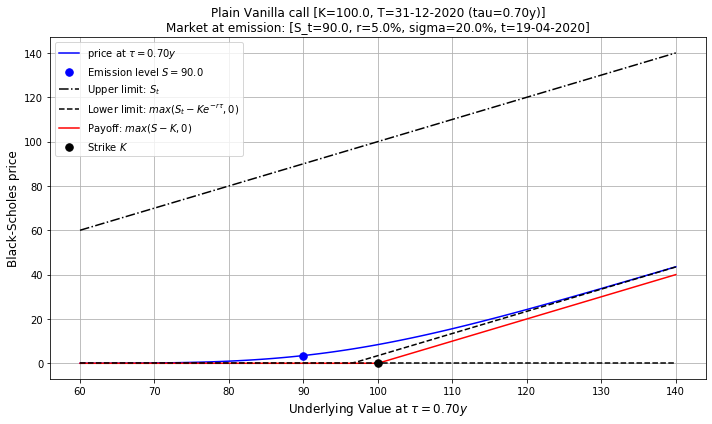

In [162]:
option_plotter.plot()

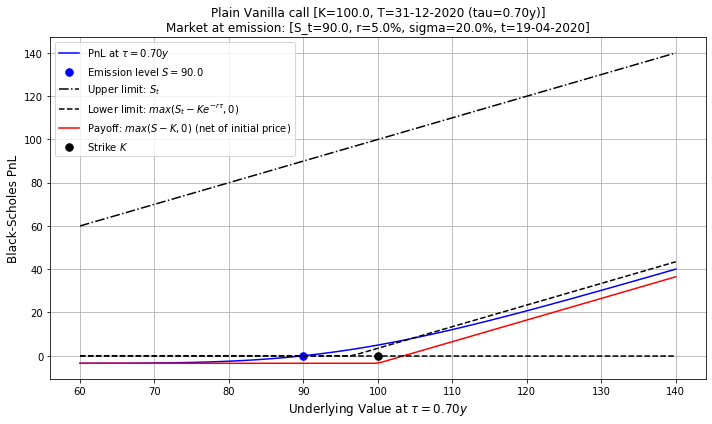

In [163]:
option_plotter.plot(plot_metrics='PnL')

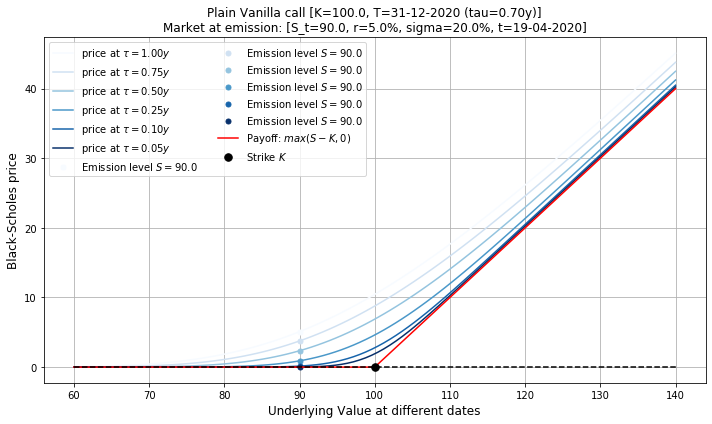

In [164]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

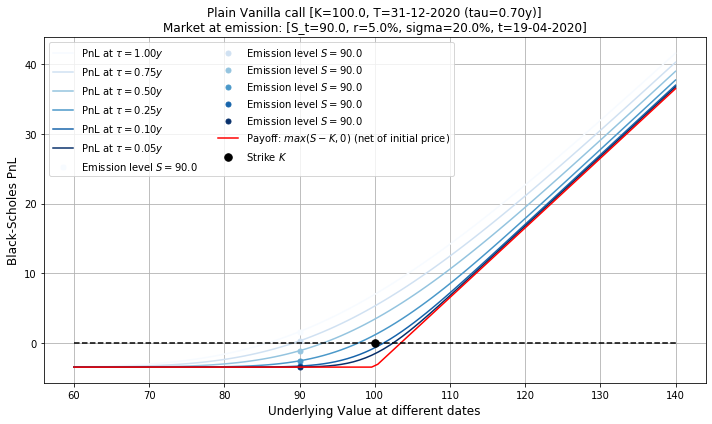

In [165]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], plot_metrics='PnL')

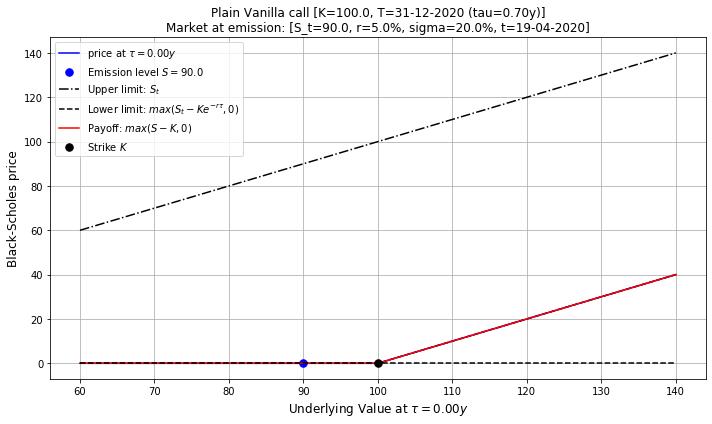

In [166]:
option_plotter.plot(tau=0.0)

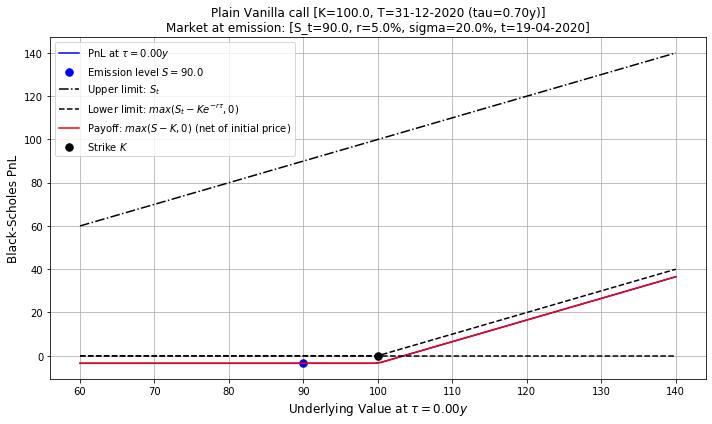

In [167]:
option_plotter.plot(tau=0.0, plot_metrics='PnL')

In [168]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [169]:
option_plotter = OptionPlotter(CON_Call)

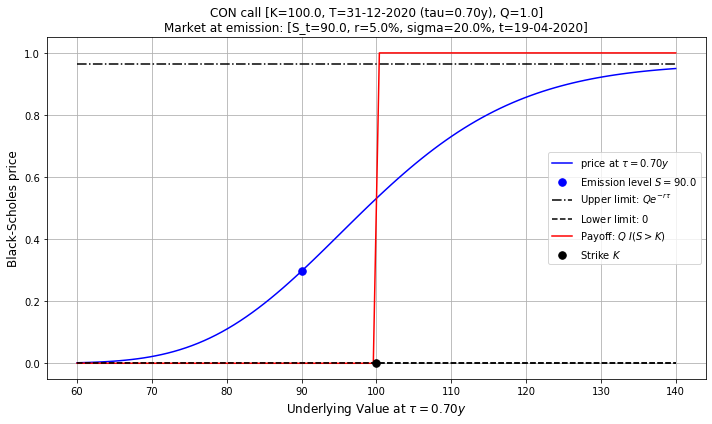

In [170]:
option_plotter.plot()

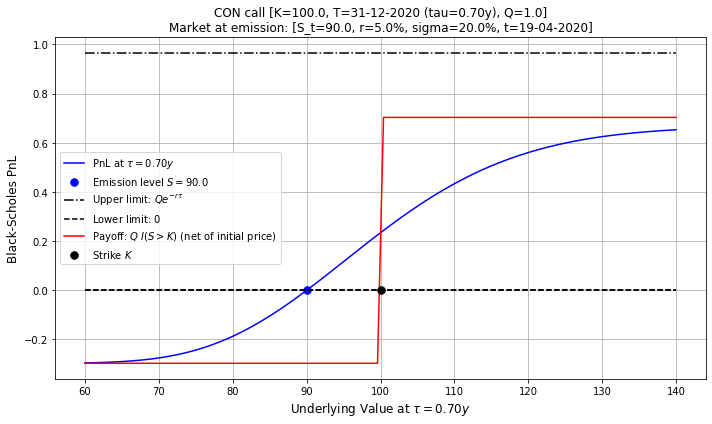

In [171]:
option_plotter.plot(plot_metrics='PnL')

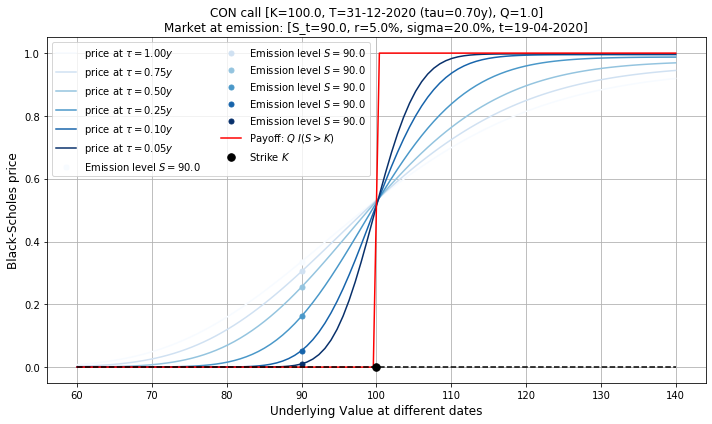

In [172]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

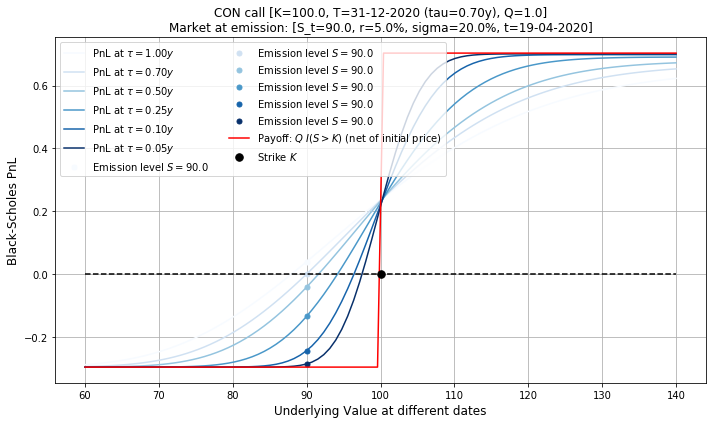

In [173]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], plot_metrics='PnL')

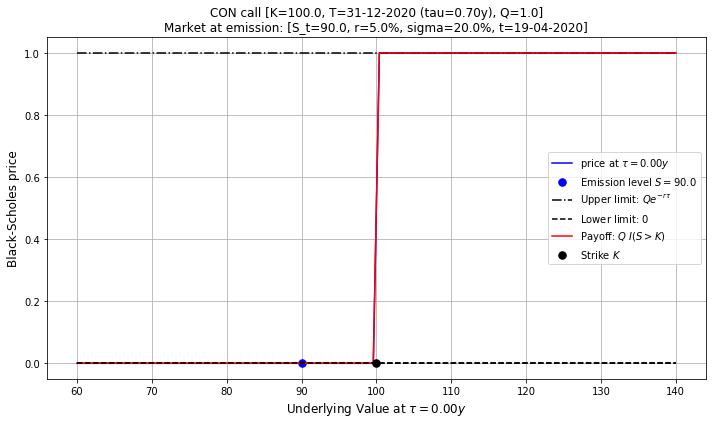

In [174]:
option_plotter.plot(tau=0.0)

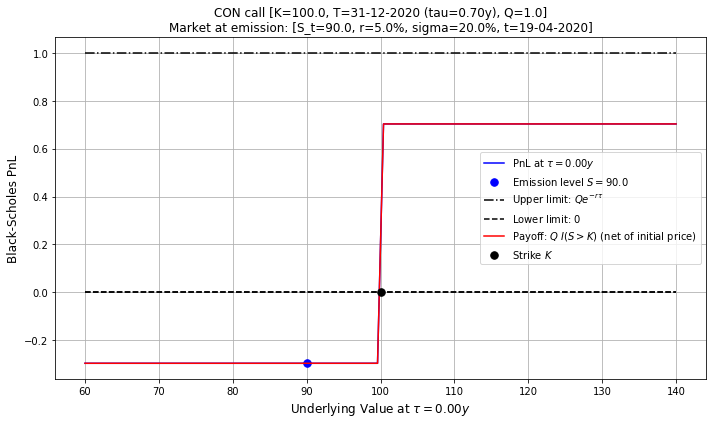

In [175]:
option_plotter.plot(tau=0.0, plot_metrics='PnL')

# Composition application: a `Portfolio()` class

- OptionStrategy() single tau (sfruttare *args **kwargs)

- riesci a fare plot multi-tau?

Notice the use of `*args` `**kwargs` optional arguments in portfolio's analytics methods. We are letting the input parameters smoothly flow trough the portfolio interface and delegating to the payoff and price methods of the single instruments, the parsing operations or the parameters. This is analogous to what we have done in sub-class initialization

In [176]:
class Portfolio:
    
    def __init__(self, name="Dummy"):
        
        # initialize an empty portfolio
        self.__composition = []
        
        # initialize empty info strings
        self.__info = "{} Portfolio: \n".format(name)
        self.__mkt_info = None
        
        # initialize underlying value, strikes and times-to-maturity attributes
        self.__S = None
        self.__K = np.array([])
        self.__tau = np.array([])
        self.is_multi_horizon = False
        
    def __repr__(self):
        return self.get_info()
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_K(self):
        return self.__K
    
    def get_S(self):
        return self.__S

    def get_tau(self):
        return self.__tau
    
    def get_composition(self):
        return self.__composition
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    # composition method
    def add_instrument(self, FinancialInstrument, position):
        
        long_short = 'Long' if position > 0 else 'Short'
        instrument_info = long_short + " {} ".format(abs(position)) + FinancialInstrument.get_info()
        
        self.__composition.append({"instrument": FinancialInstrument,
                                   "position":   position,
                                   "info":       instrument_info})
        
        # update portfolio info strings
        self.__update_info(FinancialInstrument, position)
        
        # update portfolio attributes
        self.__update_S(FinancialInstrument)
        self.__update_K(FinancialInstrument)
        self.__update_tau(FinancialInstrument)
    
    # private method to update the info
    def __update_info(self, fin_inst, pos):
        self.__info += self.__composition[-1]["info"] + "\n"
        if self.__mkt_info is None:
            self.__mkt_info = fin_inst.get_mkt_info()
            
    def __update_S(self, fin_inst):
        if self.get_S() is None:
            self.set_S(fin_inst.get_S())

            
    def __update_K(self, fin_inst):
        # append new instrument strike
        strikes = np.append(self.get_K(), fin_inst.get_K())
        # filter only distinct strikes
        self.__K = np.unique(strikes)

    def __update_tau(self, fin_inst):
        # append new instrument tau
        times_to_maturity = np.append(self.get_tau(), fin_inst.get_tau())
        # filter only distinct times-to-maturity
        self.__tau = np.unique(times_to_maturity)
        # check if the portfolio is a multi-horizon portfolio
        if len(self.__tau) > 1:
            self.is_multi_horizon = True
                    
    def __check_time_parameter(self, *args, **kwargs):
        
        # time parameter:
        time_param = args[1] if len(args) > 1 \
                        else kwargs['tau'] if 'tau' in kwargs \
                            else (kwargs['t'] if 't' in kwargs else None)
        
        # check that no multiple time parameters in input
        if isinstance(time_param, Iterable) and not isinstance(time_param, str):
            raise NotImplementedError("No multiple time parameters allowed: {} given in input.".format(time_param))
            
        # check that time parameter is not a time-to-maturity if the portfolio is multi-horizon:
        if self.is_multi_horizon and (isinstance(time_param, int) or isinstance(time_param, float)):
            raise NotImplementedError("No time-to-maturity time parameter allowed for multi-horizon \n{} \ntau={} given in input"\
                                      .format(self, time_param))  
            
    # portfolio "payoff", that is expiration value
    def payoff(self, *args, **kwargs):
        """
        Returns the portfolio payoff as the scalar product (i.e. sum of elementwise products) 
        between single instrument payoffs and positions.
        
        As single instruments .payoff(), can be called with single/multiple 'S' and single 'tau'. 
        """
           
        # check time parameter
        self.__check_time_parameter(*args, **kwargs)
              
        if self.get_composition(): 

            # single instrument payoffs and positions
            payoffs = np.array([inst["instrument"].payoff(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(payoffs)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio value (called 'price' as for single options, to implement polymorphism)
    def price(self, *args, **kwargs):
        """
        Returns the portfolio value as the scalar product (i.e. sum of elementwise products) 
        between single instrument prices and positions.
        
        As single instruments .price(), can be called with single/multiple 'S' and single 'tau'. 
        """
        
        # check time parameter
        self.__check_time_parameter(*args, **kwargs)
                                      
        if self.get_composition(): 

            # single instrument prices and positions
            prices = np.array([inst["instrument"].price(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(prices)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio P&L
    def PnL(self, *args, **kwargs):
        """
        Returns the portfolio Profit & Loss as the scalar product (i.e. sum of elementwise products) 
        between single instrument P&Ls and positions.
        
        As single instruments .PnL(), can be called with single/multiple 'S' and single 'tau'. 
        """
                
        # check time parameter
        self.__check_time_parameter(*args, **kwargs)
                                      
        if self.get_composition(): 

            # single instrument P&Ls and positions
            pnls = np.array([inst["instrument"].PnL(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(pnls)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  

In [177]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [178]:
dummy_ptf = Portfolio()
dummy_ptf

Dummy Portfolio: 

In [179]:
dummy_ptf.add_instrument(Vanilla_Call, 1)

In [180]:
dummy_ptf

Dummy Portfolio: 
Long 1 Plain Vanilla call [K=100.0, T=31-12-2020 (tau=0.70y)]

In [181]:
Vanilla_Call.get_S()

90.0

In [182]:
dummy_ptf.get_S()

90.0

In [183]:
Vanilla_Call.get_K()

100.0

In [184]:
dummy_ptf.get_K()

array([100.])

In [185]:
Vanilla_Call.get_tau()

0.7013698630136986

In [186]:
dummy_ptf.get_tau()

array([0.70136986])

In [187]:
Vanilla_Call.price()

3.487402470943657

In [188]:
dummy_ptf.price()

3.487402470943657

Let's now add a short position on 5 plain-vanilla put option contracts to our portfolio

In [189]:
put_strike = Vanilla_Call.get_K() + 20

In [190]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put', K=put_strike)
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=120.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [191]:
dummy_ptf.add_instrument(Vanilla_Put, -5)

In [192]:
dummy_ptf

Dummy Portfolio: 
Long 1 Plain Vanilla call [K=100.0, T=31-12-2020 (tau=0.70y)]
Short 5 Plain Vanilla put [K=120.0, T=31-12-2020 (tau=0.70y)]

In [193]:
Vanilla_Put.get_S()

90.0

In [194]:
dummy_ptf.get_S()

90.0

In [195]:
Vanilla_Put.get_K()

120.0

In [196]:
dummy_ptf.get_K()

array([100., 120.])

In [197]:
Vanilla_Put.get_tau()

0.7013698630136986

In [198]:
dummy_ptf.get_tau()

array([0.70136986])

In [199]:
dummy_ptf.payoff()

-150.0

In [200]:
1 * Vanilla_Call.payoff() - 5 * Vanilla_Put.payoff() 

-150.0

In [201]:
dummy_ptf.price()

-128.28989284676607

In [202]:
1 * Vanilla_Call.price() - 5 * Vanilla_Put.price() 

-128.28989284676607

In [203]:
dummy_ptf.PnL()

0.0

In [204]:
1 * Vanilla_Call.PnL() - 5 * Vanilla_Put.PnL() 

0.0

You can call with input parameters

In [205]:
S = Vanilla_Call.get_S()
S_12 = [0.8*S, 1.2*S]
S_12

[72.0, 108.0]

In [206]:
tau_short = 0.01
tau_short

0.01

In [207]:
dummy_ptf.PnL(S=S_12, tau=tau_short)

array([-111.41018214,   76.63983107])

In [208]:
1 * Vanilla_Call.PnL(S=S_12, tau=tau_short) - 5 * Vanilla_Put.PnL(S=S_12, tau=tau_short) 

array([-111.41018214,   76.63983107])

In [209]:
# raises: NotImplementedError: No multiple time parameters allowed: [0.1, 0.5] given in input.
#
# dummy_ptf.price(tau=[0.1, 0.5])

## 0. Association: a `Plotter()` class

In [210]:
class Plotter:
    """
    Interface Plotter class
    """
    
    def __init__(self, FinancialObject):
        
        print("Calling the Plotter initializer!")
        
        # parse informations from FinancialInstrument
        self.fin_inst = FinancialObject
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market at emission: " + self.fin_inst.get_mkt_info()

        # set default x-axis 
        self.__x_axis = self.x_axis(self.fin_inst.get_K())

        # set default time parameter
        self.__time_parameter, _ = self.time_parameter(self.fin_inst.get_tau())
               
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_time_parameter(self):
        return self.__time_parameter

    def get_title(self):
        return self.__title_label
    
    # utility methods
    def x_axis(self, *args, **kwargs):
        """
        Utility method to define the x-axis of the plot, optionally parsing x-axis in input.
        """
        
        # parsing optional parameter
        x = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_x_axis()
        
        # define the x-axis
        
        # case 1: a list of x-points in input. The x-axis is a wide range, including x-points
        if is_iterable(x):
            x_min = max(min(x)-20, 0.0)
            x_max = max(x)+20
        # case 2: a single x-point in input. The x-point is the middle point of the x-axis
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20

        return np.linspace(x_min, x_max, 100)
        
    def time_parameter(self, *args, **kwargs):
        """
        Utility method to define the time parameter of the plot, optionally parsing time parameter in input.
        It returns appropriate time parameter labels too.
        """
        
        # parsing optional parameter: notice the backslash operator '\' 
        # to split code into multiple lines for readability
        time = args[0] if len(args) == 1 \
               else args[1] if len(args) > 1 \
                   else (kwargs['tau'] if 'tau' in kwargs \
                       else (kwargs['t'] if 't' in kwargs else self.get_time_parameter()))
        
        # case 1: time-to-maturity in input (if Iterable, sort from longest to shortest)
        if is_numeric(time):
            time_parameter = np.sort(time)[::-1] if is_iterable_not_string(time) else time
            time_parameter_label = np.array([r"$\tau={:.2f}y$".format(tau) for tau in time_parameter]) \
                                    if is_iterable_not_string(time) else r"$\tau={:.2f}y$".format(time_parameter)

        # case 2: valuation date in input (if Iterable, sort from first to last, i.e. chronological order)
        elif is_date(time):
            time_parameter = np.array(sorted(time, key=date_string_to_datetime_obj)) if is_iterable_not_string(time) else time
            time_parameter_label = np.array([datetime_obj_to_date_string(t) for t in time_parameter]) \
                                    if is_iterable_not_string(time) else datetime_obj_to_date_string(time_parameter)

        else:
            raise TypeError("Time parameter {} in input has not recognized data-type \
                             (only 'dd-mm-YYYY' Strings or dt.datetime objects allowed)".format(type(time_parameter)))
            
        # case of one-element Iterable: reduced to scalar variables
        if is_iterable(time_parameter) and len(time_parameter) == 1:
            time_parameter = time_parameter[0]
            time_parameter_label = time_parameter_label[0]
                
        return time_parameter, time_parameter_label
    
    def parse_plot_metrics(self, *args, **kwargs):
        """
        Utility method to parse the metrics of the plot: either 'price' or 'PnL'.
        """
        plot_metrics = args[2] if len(args) > 2 else kwargs['plot_metrics'] if 'plot_metrics' in kwargs else 'price'
        return plot_metrics
    
    def parse_plot_details(self, *args, **kwargs):
        """
        Utility method to decide whether to plot details or not.
        """
        plot_details = args[3] if len(args) > 3 else kwargs['plot_details'] if 'plot_details' in kwargs else True
        return plot_details
     
    # template plot method
    def plot(self):
        raise NotImplementedError()

In [211]:
class OptionPlotter(Plotter):
    """
    Plotter class for single options
    """
    
    def __init__(self, *args, **kwargs):
        # calling the Plotter initializer
        super(OptionPlotter, self).__init__(*args, **kwargs)
                                    
    def plot(self, *args, **kwargs):
        
        # argument parsing and plot setup
        x_axis = self.x_axis(*args, **kwargs)
        time_parameter, time_label_parameter = self.time_parameter(*args, **kwargs)
        plot_metrics = self.parse_plot_metrics(*args, **kwargs)

        if is_iterable_not_string(time_parameter):
            self.__plot_multi_time(x_axis, time_parameter, time_label_parameter, plot_metrics)
        else:
            plot_limits = self.parse_plot_details(*args, **kwargs)
            self.__plot_single_time(x_axis, time_parameter, time_label_parameter, plot_metrics, plot_limits)
                    
    def __plot_multi_time(self, S, multiple_times, time_labels, plot_metrics):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple dates.
        Dates can be specified either as date Strings or time-to-maturity values.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multiple_times))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different date
        for time, time_label in zip(multiple_times, time_labels):
            ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), '-', lw=1.5, 
                    label=plot_metrics + r" at " + time_label)

        # blue dot at original underlying level for reference
        for time, time_label in zip(multiple_times, time_labels):
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), '.', ms=10, 
                    label=r"Emission level $S={:.1f}$".format(S_t))
            
        # plot the red payoff line for different underlying values
        if plot_metrics == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different dates", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
 
    def __plot_single_time(self, S, time, time_label, plot_metrics, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed date. 
        Date can be specified either as date String or time-to-maturity value.
        Optionally, it plots theoretical upper and lower bounds of the price.
        """
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), 'b-', lw=1.5, 
                label=plot_metrics + r" at " + time_label)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), 'b.', ms=15, 
                label=r"Emission level $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, time), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, time), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if plot_metrics == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at " + time_label, fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [212]:
Vanilla_Call_plotter = OptionPlotter(Vanilla_Call)

Calling the Plotter initializer!


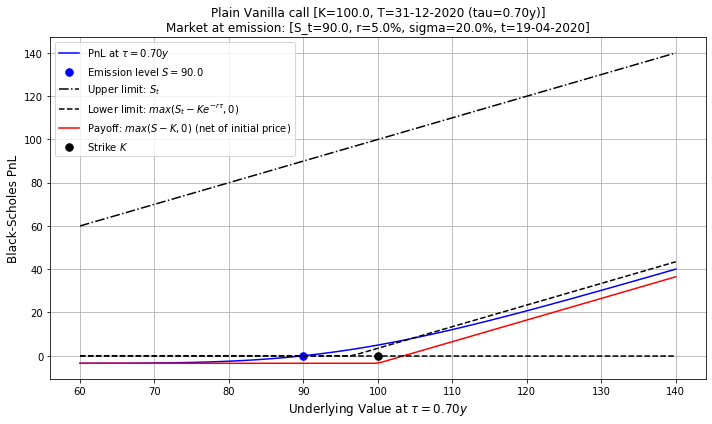

In [213]:
Vanilla_Call_plotter.plot(plot_metrics='PnL')

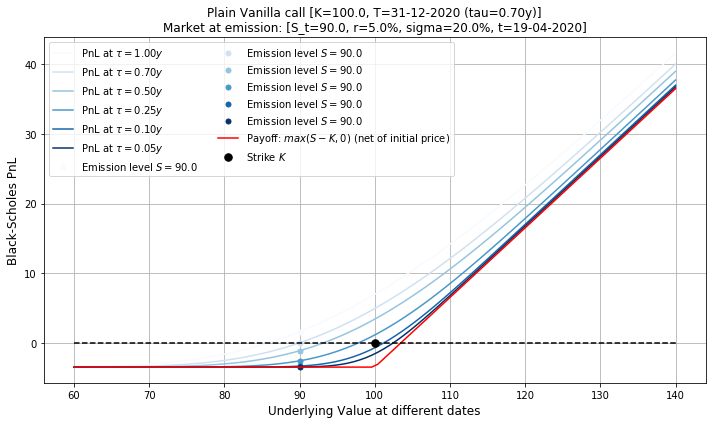

In [214]:
Vanilla_Call_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], plot_metrics='PnL')

In [215]:
class PortfolioPlotter(Plotter):
    """
    Plotter class for portfolio of options
    """
    
    def __init__(self, *args, **kwargs):
        # calling the Plotter initializer
        super(PortfolioPlotter, self).__init__(*args, **kwargs)

    def plot(self, *args, **kwargs):
        
        # argument parsing and plot setup
        x_axis = self.x_axis(*args, **kwargs)
        time_parameter, time_label_parameter = self.time_parameter(*args, **kwargs)
        plot_metrics = self.parse_plot_metrics(*args, **kwargs)

        if is_iterable_not_string(time_parameter):
            self.__plot_multi_time(x_axis, time_parameter, time_label_parameter, plot_metrics)
        else:
            plot_instrument_payoffs = self.parse_plot_details(*args, **kwargs)
            self.__plot_single_time(x_axis, time_parameter, time_label_parameter, plot_metrics, plot_instrument_payoffs)
                    
    def __plot_multi_time(self, S, multiple_times, time_labels, plot_metrics):
        """
        Plot Portfolio values against underlying value(s), possibly at multiple dates.
        Dates can be specified either as date Strings or time-to-maturity values.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multiple_times))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different date
        for time, time_label in zip(multiple_times, time_labels):
            ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), '-', lw=1.5, 
                    label=plot_metrics + r" at " + time_label)

        # blue dot at original underlying level for reference
        for time, time_label in zip(multiple_times, time_labels):
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), '.', ms=10, 
                    label=r"Emission level $S={:.1f}$".format(S_t))

        # plot the red payoff line for different underlying values
        if not self.fin_inst.is_multi_horizon:
            if plot_metrics == 'PnL':
                ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=r"PnL at maturity")
            else:
                ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=r"Payoff at maturity")
            
        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_time(self, S, time, time_label, plot_metrics, plot_instrument_payoffs):
        """
        Plot Portfolio values against underlying value(s) at fixed date. 
        Date can be specified either as date String or time-to-maturity value.
        Optionally, it plots theoretical upper and lower bounds of the price.
        """
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, getattr(self.fin_inst, plot_metrics)(S, time), 'b-', lw=1.5, 
                label=plot_metrics + r" at " + time_label)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, plot_metrics)(S_t, time), 'b.', ms=15, 
                label=r"Emission level $S={:.1f}$".format(S_t))
        
        # plot the red payoff line for different underlying values
        if not self.fin_inst.is_multi_horizon:
            if plot_metrics == 'PnL':
                ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=r"PnL at maturity")
            else:
                ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=r"Payoff at maturity")

        # optionally, plot the instruments payoffs
        if plot_instrument_payoffs:
            
            # set a color cycle according to the number of instruments in portfolio
            number_of_instruments = len(self.fin_inst.get_composition())
            plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,number_of_instruments)))
            
            for inst in self.fin_inst.get_composition():
                position = inst["position"]

                if plot_metrics == 'PnL':
                    ax.plot(S, position * inst["instrument"].PnL(S, tau=0.0), '--',  lw=1.5, 
                            label=inst["info"] + r" PnL at maturity")
                else:
                    ax.plot(S, position * inst["instrument"].payoff(S), '--',  lw=1.5, 
                            label=inst["info"] + r" payoff at maturity")
                
        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at " + time_label, fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(plot_metrics), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

we check the `PortfolioPlotter` in some specific situations

## A. Short positions on options

Let's start making a simple option strategy: a short Put position.

In [216]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [217]:
short_put_ptf = Portfolio()
short_put_ptf.add_instrument(Vanilla_Put, -1)
short_put_ptf

Dummy Portfolio: 
Short 1 Plain Vanilla put [K=100.0, T=31-12-2020 (tau=0.70y)]

In [218]:
ptf_plotter = PortfolioPlotter(short_put_ptf)

Calling the Plotter initializer!


Here is the value of the short position:

- the red line represents the payoff of the position: negative if the option is exercised at maturity, otherwise null;
- the blue line represents is the nominally negative value of the position. You can think of it as the amount of money needed to close the position when the residual time-to-maturity of the option is $\tau$, that is to buy (aka _going long_ ) another put with same strike and expiration date of the one we sold.

In our example we sold a put option of strike $K=\$100$ and time-to-maturity $\tau=0.7$ years (when the market value of the underlying was $S_t = \$90 $) and evaluate the position for different values of the underlying when the residual time-to-maturity of the option is $\tau=0.3$ years. 

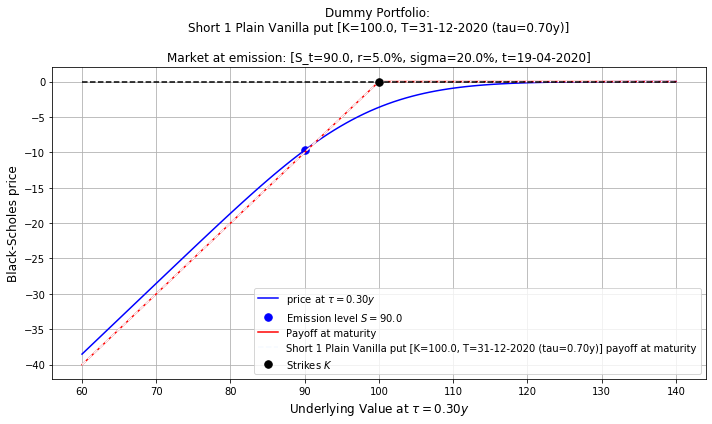

In [219]:
ptf_plotter.plot(tau=0.3)

As we see, the put gets exercised at maturity if $S_T < K$, and, at maturity, it generates a profit if the initial payment $p(S_t=\$90; \tau=0.7y)$ received when the put is sold is not offset by the payoff $K-S_T$ to be granted to owner of the option if he/she exercises the option at expiration $T$. 

Notice that comparing the payoff paid at maturity with the initial price of the option, as we are doing, intentionally neglects the time value of money.

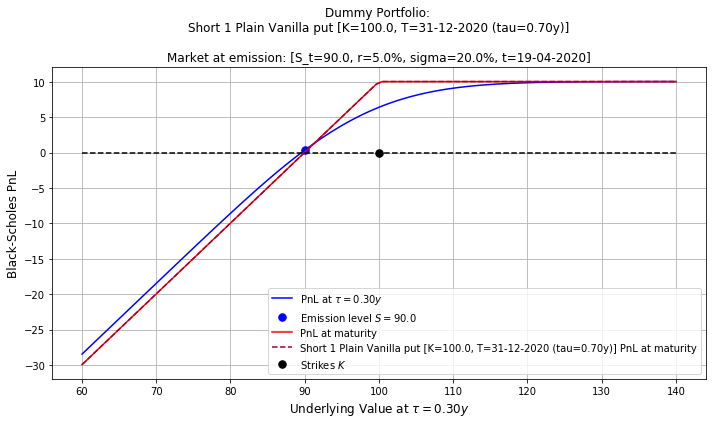

In [220]:
ptf_plotter.plot(plot_metrics='PnL', tau=0.3)

Notice a detail: given an initial price $p(S=\$90; \tau=0.7y)$ of

In [221]:
Vanilla_Put.price()

10.041330587465126

and a current price at same underlying value $p(S=\$90; \tau=0.3y)$ of 

In [222]:
Vanilla_Put.price(tau=0.3) # it uses .get_S() == $90

9.696591386961757

Due to the elapsed time (as time pass, options tend to get cheaper), the value of the put at $S_t=\$90$ decreased from $p(S=\$90; \tau=0.7y) \approx \$10.04 $ to $p(S=\$90; \tau=0.3y) \approx \$9.70$. That is - all else being equal (in particular $S=\$90$) - if we were to close our position (i.e. buy another option of same strike and maturity date) when $\tau=0.3$, we would have to pay less money $p(S=\$90; \tau=0.3y)$ than those we have received $p(S=\$90; \tau=0.7y)$ when we sold it. This slight decrease makes the 

$$
P\&L(S=\$90; \tau=0.3y) = p(S=\$90; \tau=0.3y) - p(S=\$90; \tau=0.7y) > 0
$$

slightly positive. 

In [223]:
short_put_ptf.PnL(tau=0.3)

0.34473920050336915

In [224]:
Vanilla_Put.price() - Vanilla_Put.price(tau=0.3)

0.34473920050336915

## B. spreads e straddles (same $\tau$ strategy)

### Bull spread

In [225]:
K_long = 80
K_short = 110

In [226]:
Vanilla_Call_long = PlainVanillaOption(market_env, K=K_long)
Vanilla_Call_long

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [227]:
Vanilla_Call_short = PlainVanillaOption(market_env, K=K_short)
Vanilla_Call_short

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [228]:
bull_spread_ptf = Portfolio(name="Bull Spread Strategy")
bull_spread_ptf.add_instrument(Vanilla_Call_long, 1)
bull_spread_ptf.add_instrument(Vanilla_Call_short, -1)
bull_spread_ptf

Bull Spread Strategy Portfolio: 
Long 1 Plain Vanilla call [K=80.0, T=31-12-2020 (tau=0.70y)]
Short 1 Plain Vanilla call [K=110.0, T=31-12-2020 (tau=0.70y)]

In [229]:
bull_spread_ptf_plotter = PortfolioPlotter(bull_spread_ptf)

Calling the Plotter initializer!


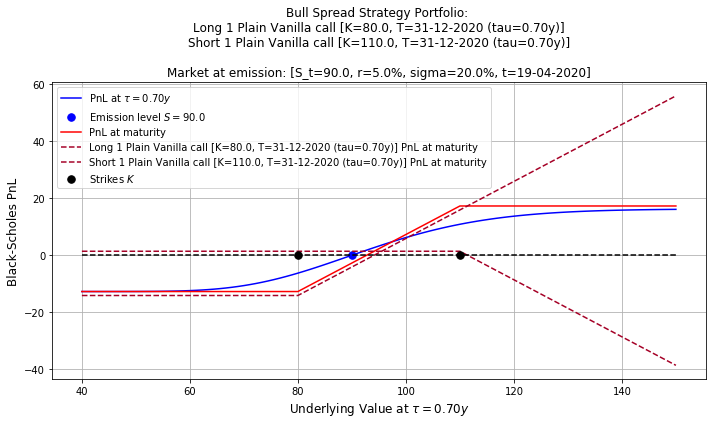

In [230]:
bull_spread_ptf_plotter.plot(plot_metrics="PnL", plot_instrument_payoffs=True)

### Straddle

In [231]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [232]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [233]:
straddle_ptf = Portfolio(name="Straddle Strategy")
straddle_ptf.add_instrument(Vanilla_Call, 1)
straddle_ptf.add_instrument(Vanilla_Put, 1)
straddle_ptf

Straddle Strategy Portfolio: 
Long 1 Plain Vanilla call [K=100.0, T=31-12-2020 (tau=0.70y)]
Long 1 Plain Vanilla put [K=100.0, T=31-12-2020 (tau=0.70y)]

In [234]:
straddle_ptf_plotter = PortfolioPlotter(straddle_ptf)

Calling the Plotter initializer!


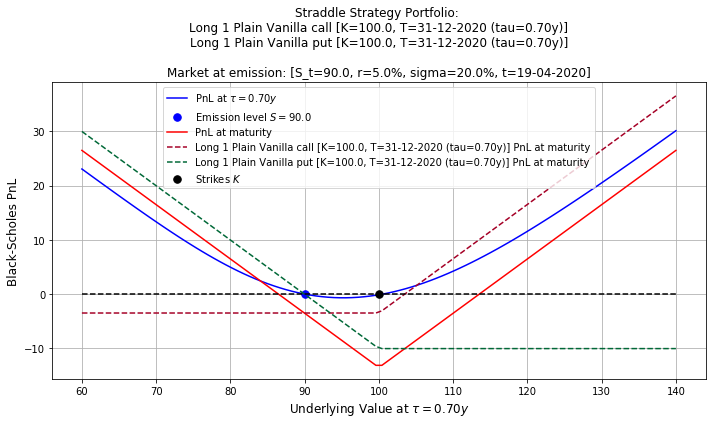

In [235]:
straddle_ptf_plotter.plot(plot_metrics="PnL", plot_instrument_payoffs=True)

## C. calendar spreads (multi $\tau$ strategy)

In [236]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [237]:
T_short_term = "31-05-2020"
T_long_term = "30-08-2020"

In [238]:
Vanilla_Call_short_term = PlainVanillaOption(market_env, T=T_short_term, K = market_env.get_S()-10)
Vanilla_Call_short_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=31-05-2020, tau=0.12y, r=5.0%, sigma=20.0%)

In [239]:
Vanilla_Call_long_term = PlainVanillaOption(market_env, T=T_long_term, K = market_env.get_S()-10)
Vanilla_Call_long_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=80.0, t=19-04-2020, T=30-08-2020, tau=0.36y, r=5.0%, sigma=20.0%)

In [240]:
calendar_spread_ptf = Portfolio(name="Calendar Spread Strategy")
calendar_spread_ptf.add_instrument(Vanilla_Call_short_term, -1)
calendar_spread_ptf.add_instrument(Vanilla_Call_long_term, 1)
calendar_spread_ptf

Calendar Spread Strategy Portfolio: 
Short 1 Plain Vanilla call [K=80.0, T=31-05-2020 (tau=0.12y)]
Long 1 Plain Vanilla call [K=80.0, T=30-08-2020 (tau=0.36y)]

In [241]:
calendar_spread_ptf_plotter = PortfolioPlotter(calendar_spread_ptf)

Calling the Plotter initializer!


In [242]:
T_short_term

'31-05-2020'

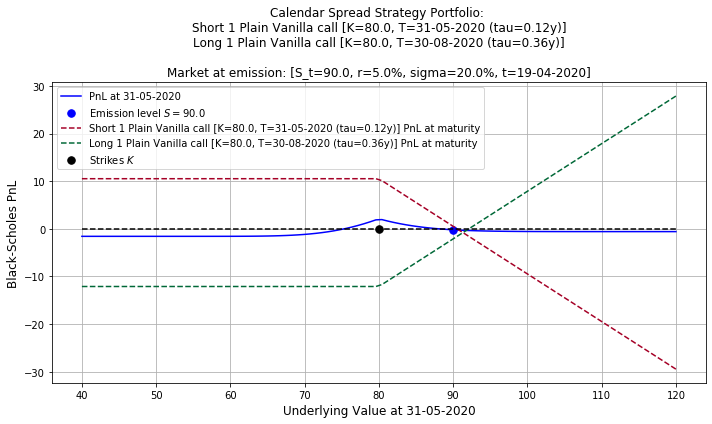

In [243]:
calendar_spread_ptf_plotter.plot(t=T_short_term, plot_metrics="PnL", plot_single_instruments=True)

In [244]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [245]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [246]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [247]:
option_plotter = OptionPlotter(Vanilla_Call)

Calling the Plotter initializer!


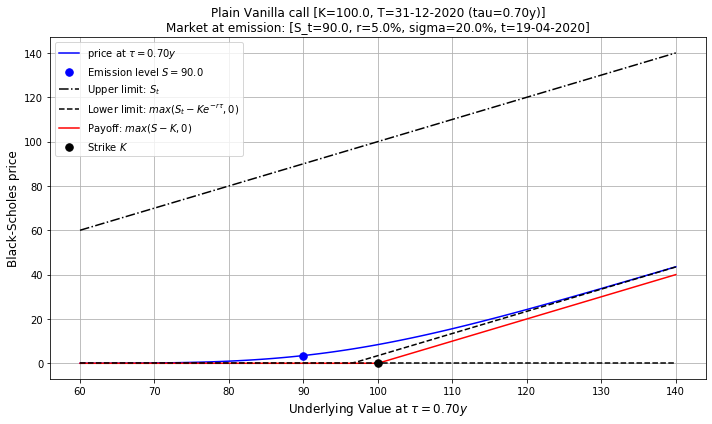

In [248]:
option_plotter.plot()

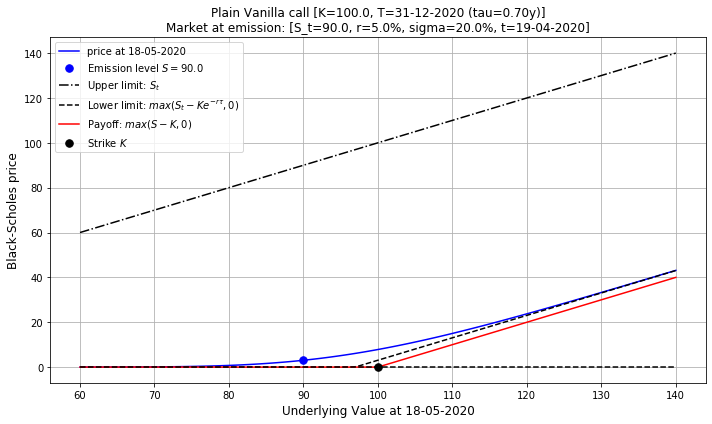

In [249]:
option_plotter.plot(t="18-05-2020")

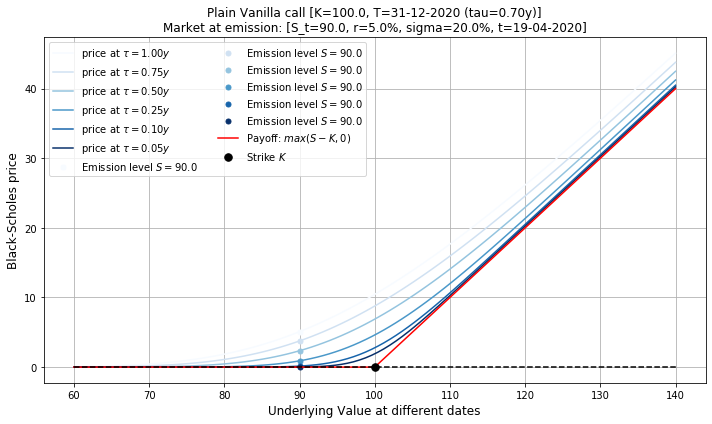

In [250]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

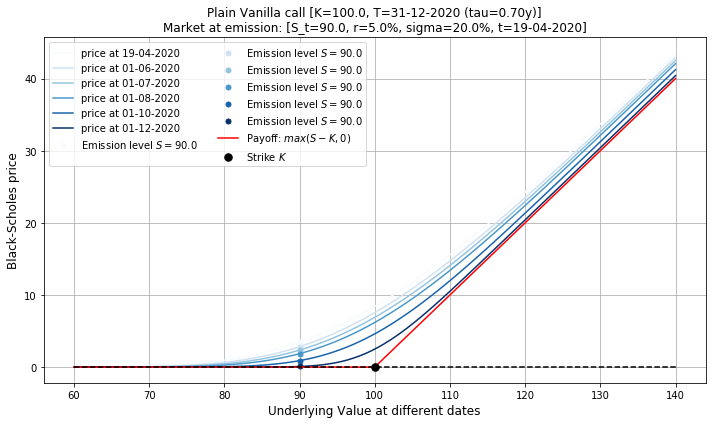

In [251]:
option_plotter.plot(t=[datetime_obj_to_date_string(market_env.get_t()), "01-06-2020", "01-07-2020", "01-08-2020", "01-10-2020", "01-12-2020"])

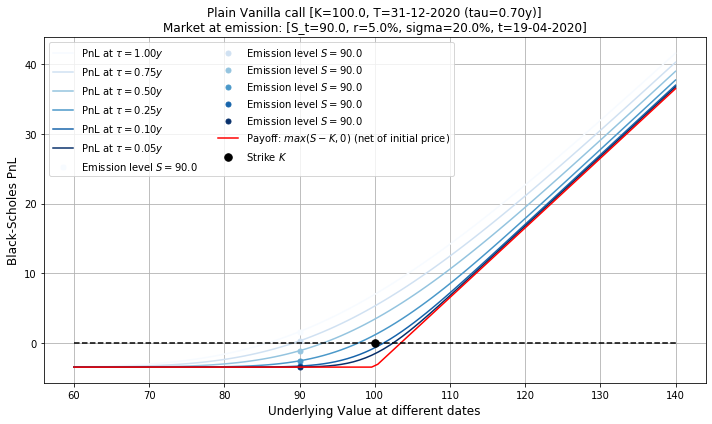

In [252]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], plot_metrics='PnL')

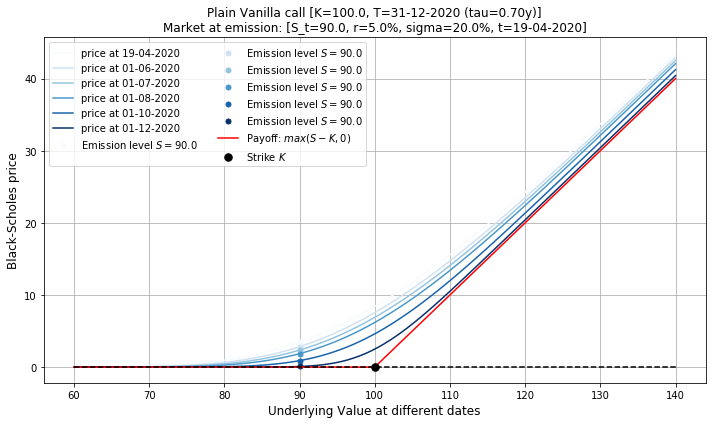

In [253]:
option_plotter.plot(t=[datetime_obj_to_date_string(market_env.get_t()), "01-06-2020", "01-07-2020", "01-08-2020", "01-10-2020", "01-12-2020"])

In [254]:
Vanilla_Call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [255]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [256]:
x = pd.date_range(start=market_env.get_t(), end=Vanilla_Call.get_T(), periods=3)

In [257]:
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [258]:
isinstance(x, Iterable)

True

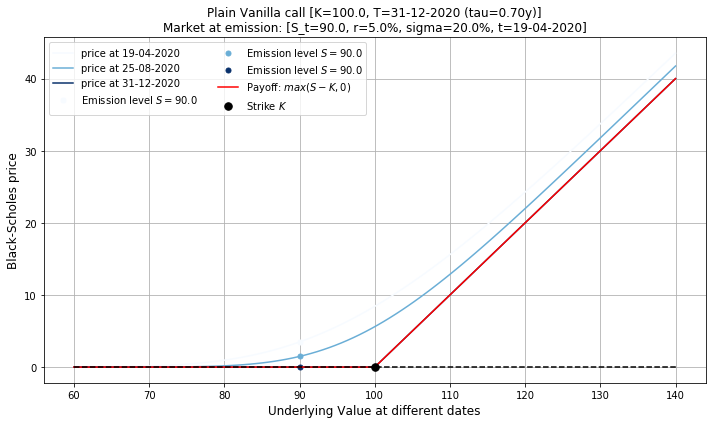

In [259]:
option_plotter.plot(tau=x)

In [260]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [261]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [262]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [263]:
option_plotter = OptionPlotter(Vanilla_Call)

Calling the Plotter initializer!


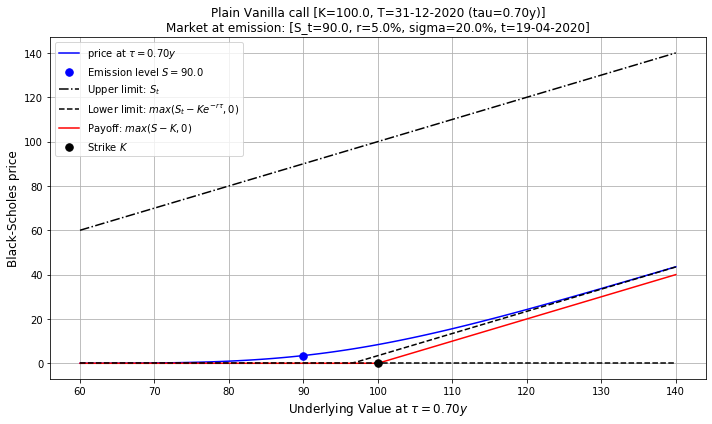

In [264]:
option_plotter.plot()

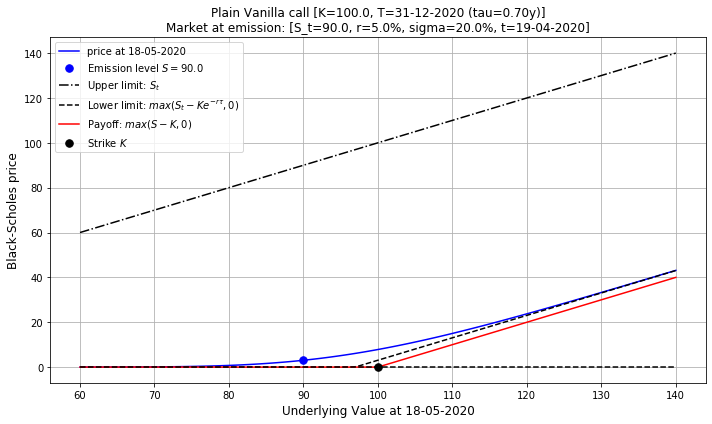

In [265]:
option_plotter.plot(t="18-05-2020")

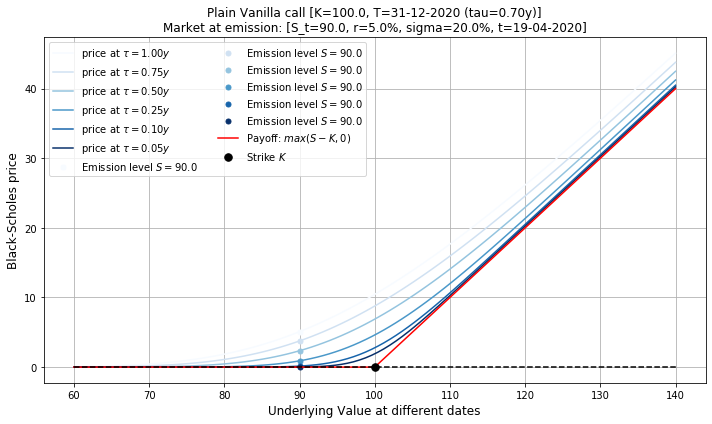

In [266]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

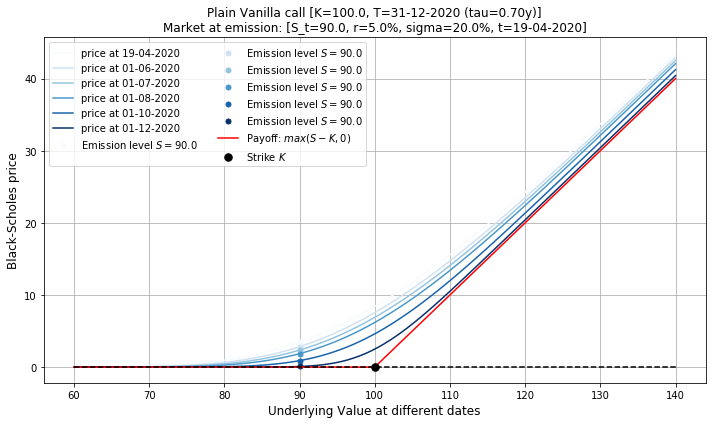

In [267]:
option_plotter.plot(t=[datetime_obj_to_date_string(market_env.get_t()), "01-06-2020", "01-07-2020", "01-08-2020", "01-10-2020", "01-12-2020"])

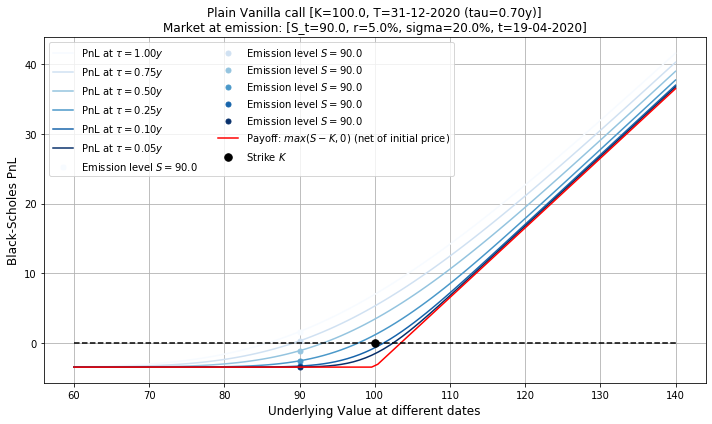

In [268]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], plot_metrics='PnL')

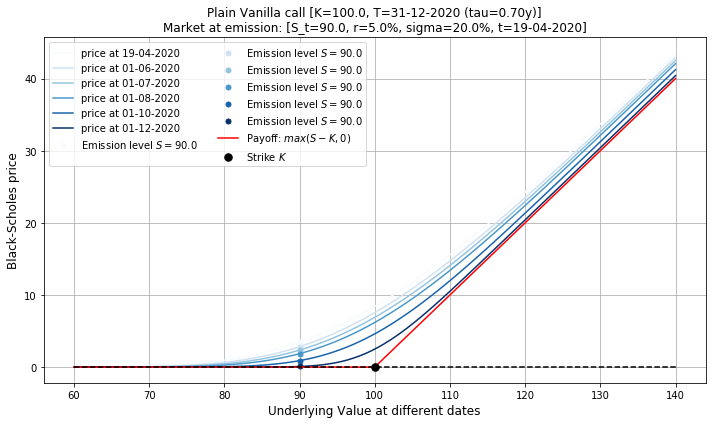

In [269]:
option_plotter.plot(t=[datetime_obj_to_date_string(market_env.get_t()), "01-06-2020", "01-07-2020", "01-08-2020", "01-10-2020", "01-12-2020"])

In [270]:
Vanilla_Call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [271]:
market_env.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [272]:
x = pd.date_range(start=market_env.get_t(), end=Vanilla_Call.get_T(), periods=3)
x

DatetimeIndex(['2020-04-19', '2020-08-25', '2020-12-31'], dtype='datetime64[ns]', freq=None)

In [273]:
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [274]:
isinstance(x, Iterable)

True

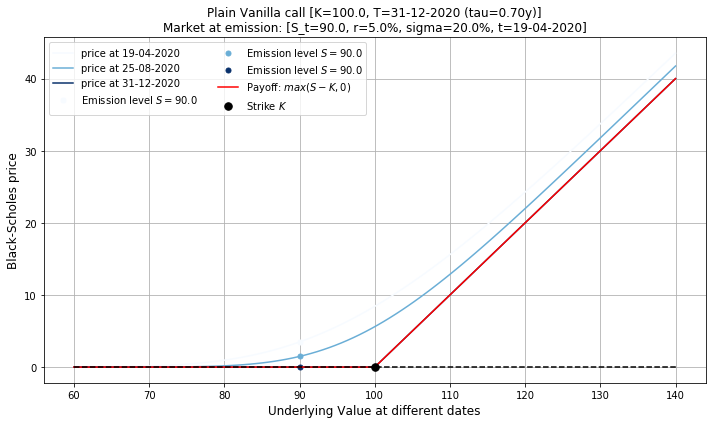

In [275]:
option_plotter.plot(tau=x)

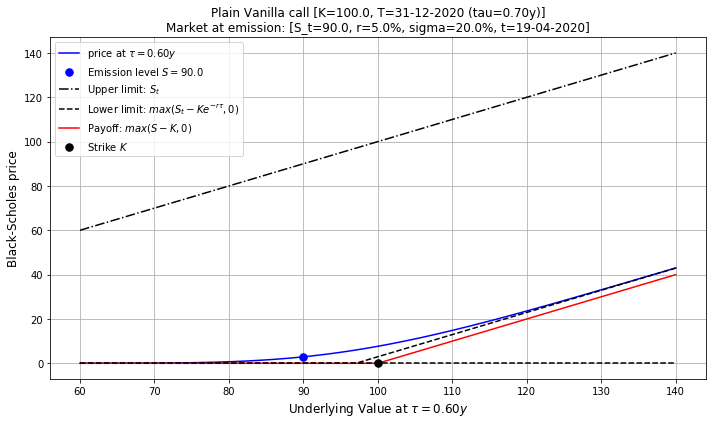

In [276]:
option_plotter.plot(tau=0.6)

In [277]:
option_plotter.plot(t="a")

String 'a' in input is not conform to 'dd-mm-YYYY' date format


ValueError: time data 'a' does not match format '%d-%m-%Y'

In [ ]:
time = [3]

In [ ]:
time

In [ ]:
time_parameter = np.array(sorted(["01-07-2020", "03-06-2020"], key=date_string_to_datetime_obj))

In [ ]:
time_parameter

In [ ]:
def f(x):
    return x, x+1

In [ ]:
y, _ = f(5)

In [ ]:
y